## Business Problem: Employee Attrition
### Employee attrition is a major issue facing the organizations since it leads to increased costs, talent loss, low productivity, decreased morale, poor employer brand, and operational disruptions. Specifically, the high percentage of employees who constantly leave their posts forces employers to spend extensive resources on their training and hiring new staff, including the expenses for losing experienced specialists as well as the productivity decrease related to continuous human resources acquisition. Additionally, frequent employee departures can cause negative morale and brand consequences by making the organization less appealing for the high-potential candidates. Lastly, the lack of engaged staff members may also lead to numerous critical operational positions remaining vacant, thereby adversely affecting the firm’s business results. Thus, the companies should address the identified problems to effectively reduce the employee turnover, such as insufficient career opportunities, ineffective management, avoided compensation or slow promotions, and poor work-life balance.

## Objective:
### The goal is to utilize data analytics for unveiling patterns and predictors of attrition, enabling HR experts and management to take well-informed and data-driven decisions. Knowing which factors are most related to departures, the organization can tailor interventions to enhance staff retention, satisfaction, and other performance metrics. As such, the problem is not only limited to forecasting who might leave but also involves providing answers to the ‘why’ and ‘how,’ which concerns reasons for which employees leave and strategies the company can adopt to address these problems.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
df = pd.read_csv('Human_Resources.csv')
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#lets count the numerical and categorical columns
numerical_numerical = df.select_dtypes(include='number')
categorical_features = df.select_dtypes(include='object')
categorical_features



,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


<Axes: >

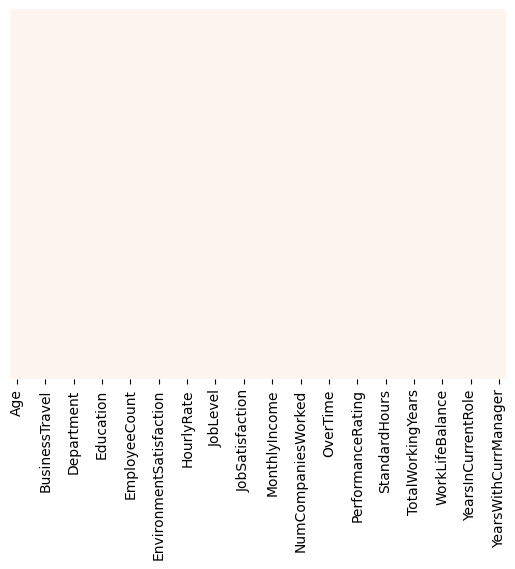

In [5]:
df.isnull().sum()
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Reds")

In [6]:
#lets count unique values in each column
for col in df.columns:
    print(col, df[col].nunique())

Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


#### Education, EnvironmentalSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, NumCompaniesWorked,PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance (these variables are not continuous variables, instead these are categorical vairables which are encoded with digits, along with 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'Over18', 'OverTime')

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Exploratory Data Analysis

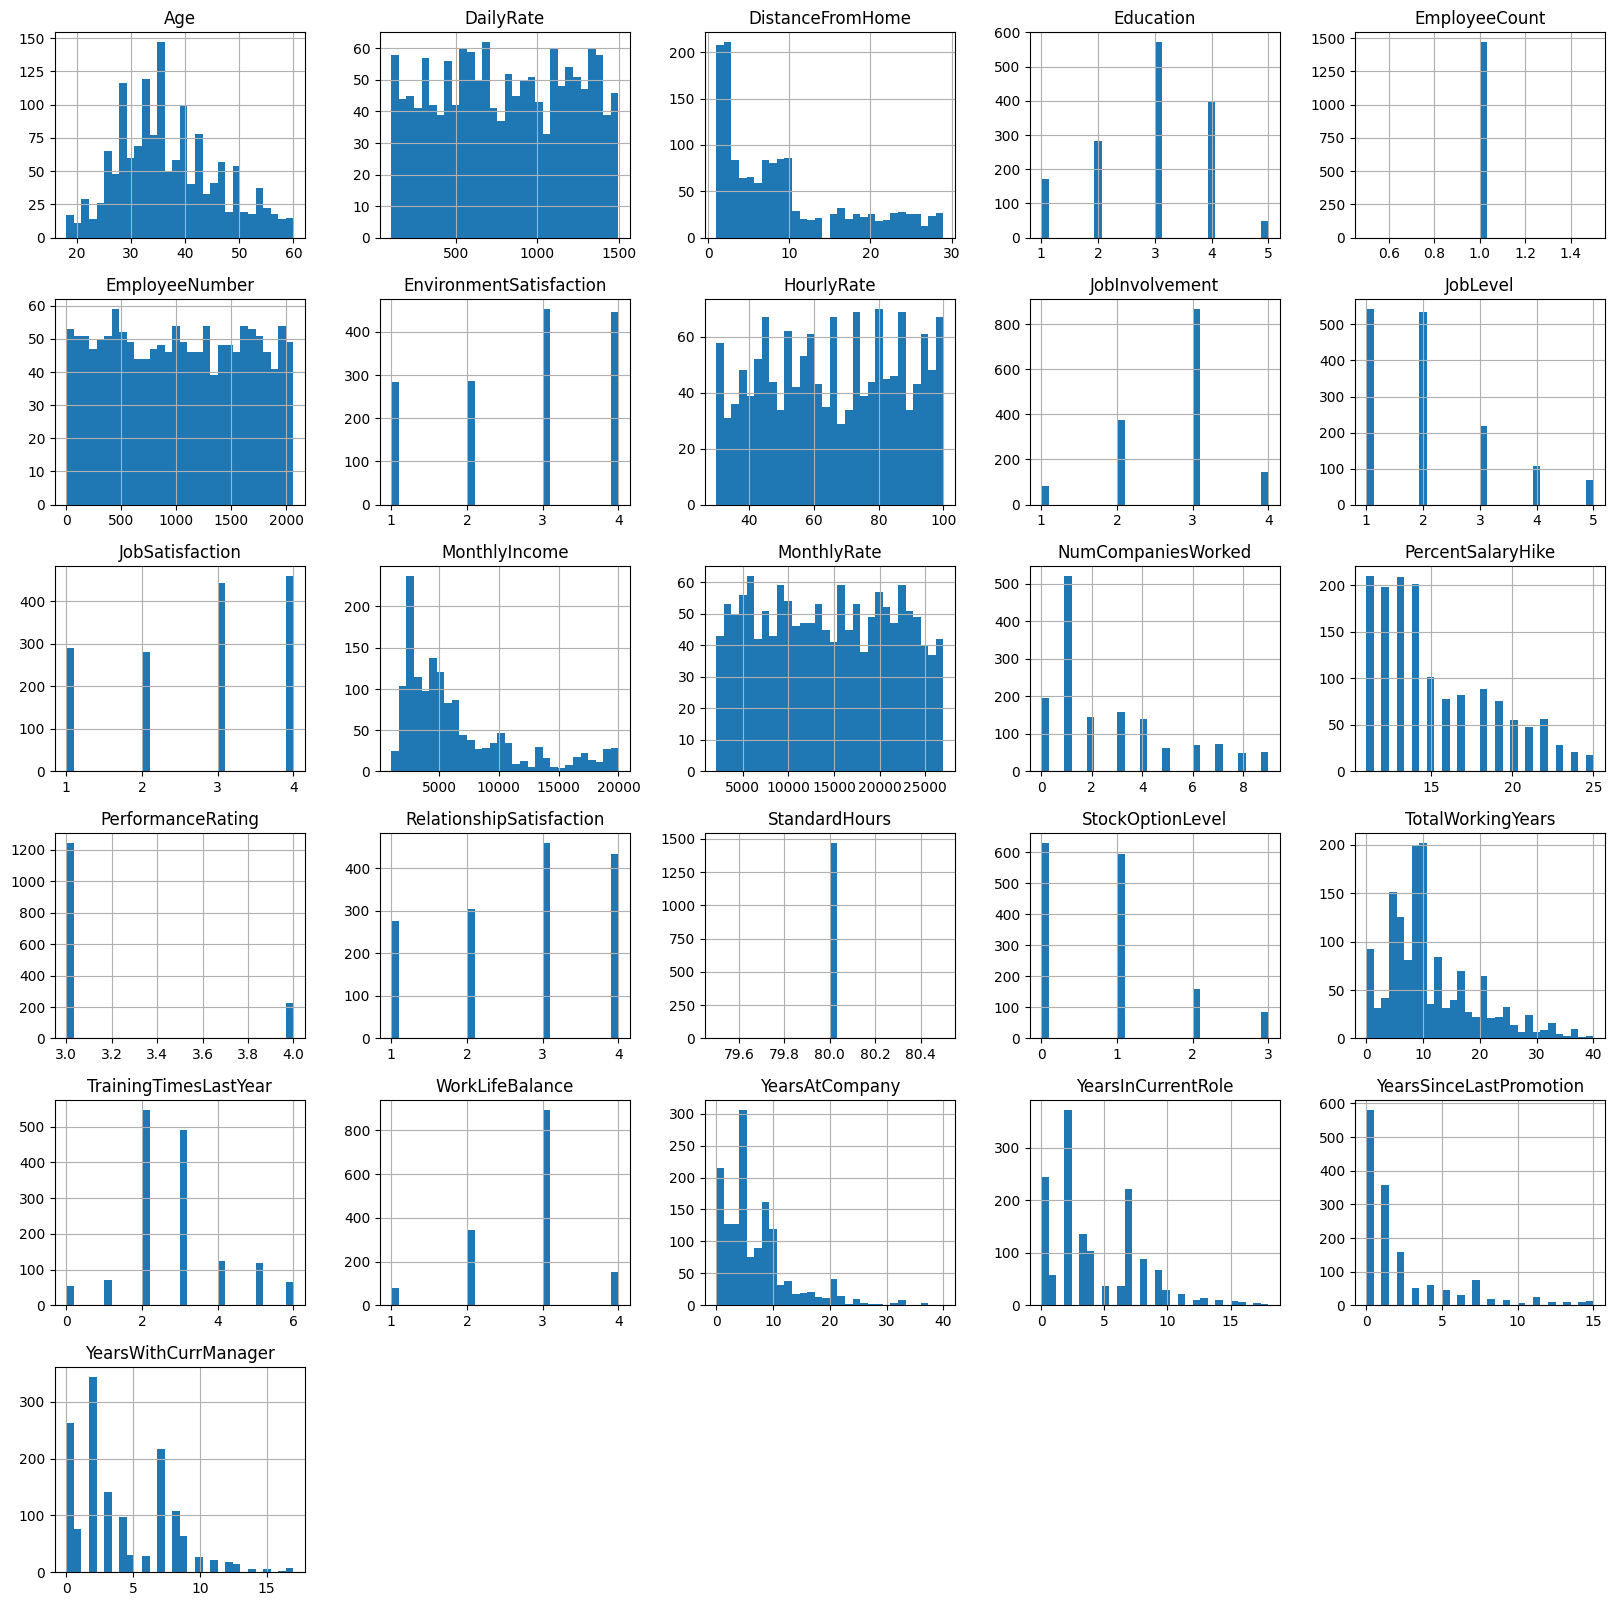

In [8]:
#lets plot histogram
df.hist(bins=30,figsize=(20, 20))
plt.show()

### From the initial data exploration and univariate analysis, several insights can be drawn from the summary statistics and histograms of the features. Two features, 'EmployeeCount' and 'StandardHours,' show no variability, consisting of a single repeated value across the entire dataset, making them non-informative. Similarly, 'EmployeeNumber' serves as an identifier for each employee and does not provide meaningful information for analysis, so these three features can be eliminated.

C:\Users\rajar\AppData\Local\Temp\ipykernel_41384\3901466750.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', 9)


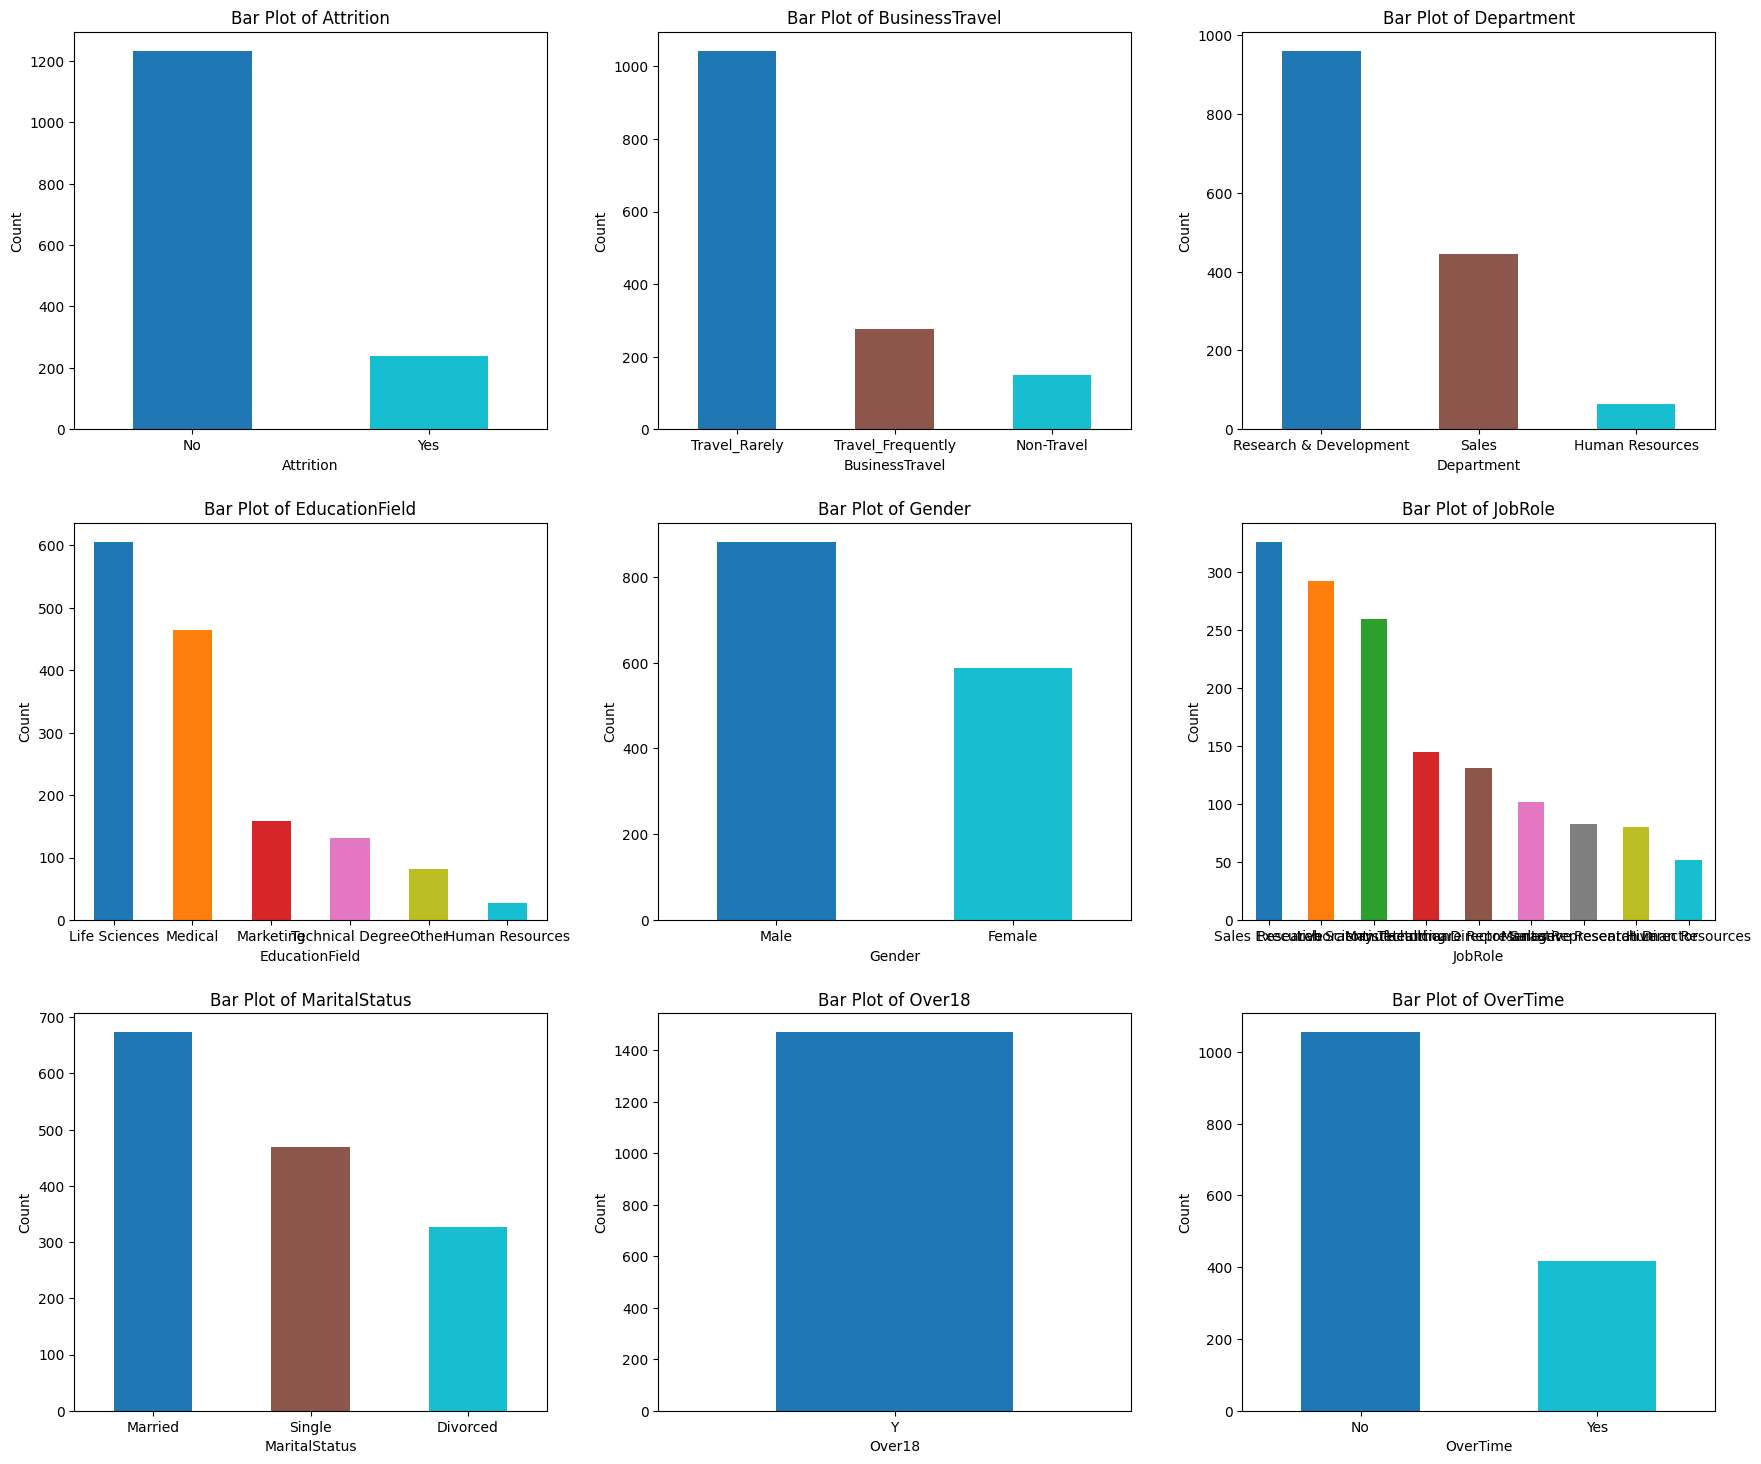

In [9]:
# lets explore categorical features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  
axes = axes.flatten()
colors = cm.get_cmap('tab10', 9)
for i, col in enumerate(categorical_features):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color=colors(np.linspace(0, 1, len(df[col].unique()))))
    axes[i].set_title(f'Bar Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=0)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=2)
plt.show()

### From plot of Atrrition it is clear that our target variable is highly imbalanced. Which may badly affect the predictions made by models. 
### Attrition = 0: 1233 instances (majority class)
### Attrition = 1: 237 instances (minority class)

### The "Over18" column shows no variability, as all employees are over 18, making it redundant for analysis.
### So, after initial data exploration it is clear that four columns/features/variables are of no use, named EmployeeCount, StandardHours, EmployeeNumber and Over18.

In [10]:
# Lets drop the columns which are not useful
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

## Bivariate Analysis of Features

C:\Users\rajar\AppData\Local\Temp\ipykernel_41384\2330586837.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='Age', palette=custom_palette)


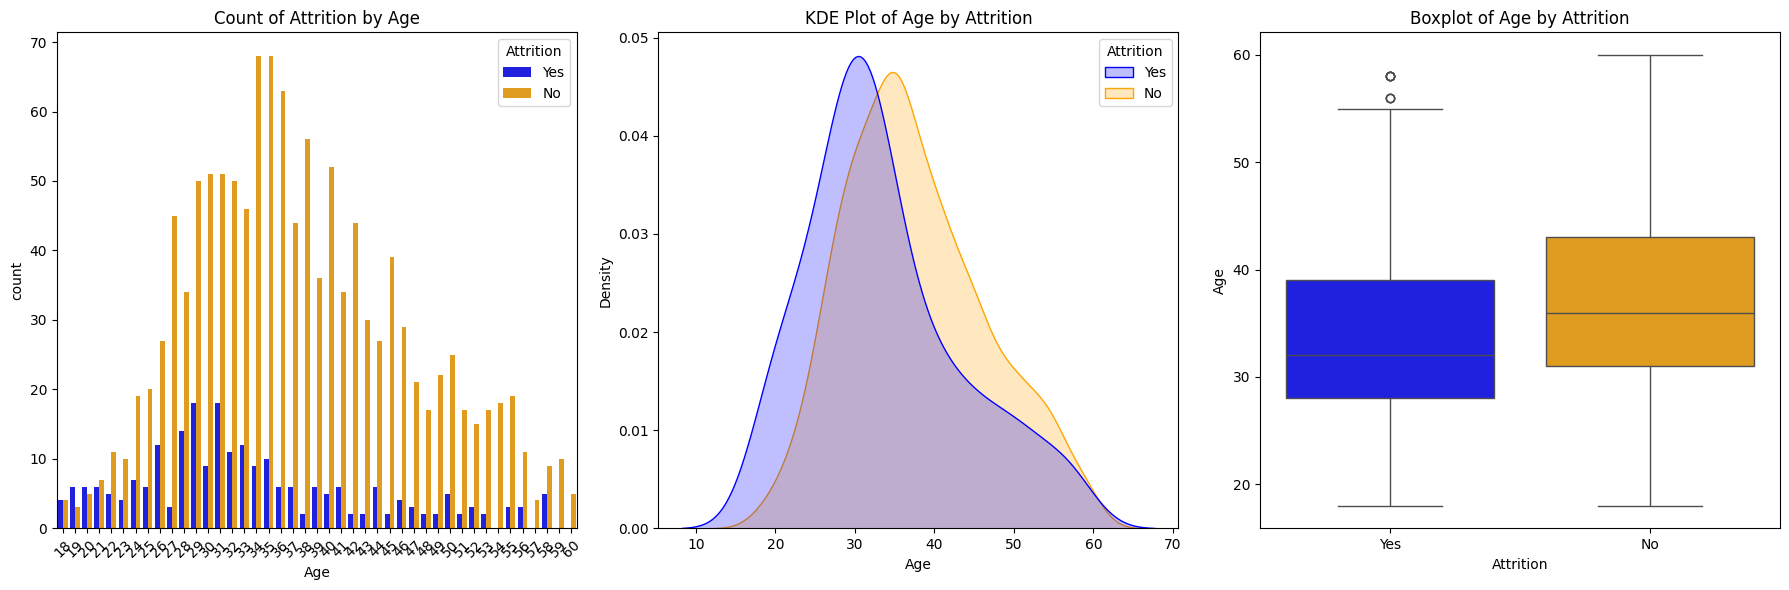

In [11]:
custom_palette = {'Yes': 'blue', 'No': 'orange'}
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Age', hue='Attrition', palette=custom_palette)
plt.title('Count of Attrition by Age')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.kdeplot(data=df, x='Age', hue='Attrition', fill=True, common_norm=False, palette=custom_palette)
plt.title('KDE Plot of Age by Attrition')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Attrition', y='Age', palette=custom_palette)
plt.title('Boxplot of Age by Attrition')

plt.tight_layout()
plt.show()

C:\Users\rajar\AppData\Local\Temp\ipykernel_41384\117526402.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette=custom_palette)


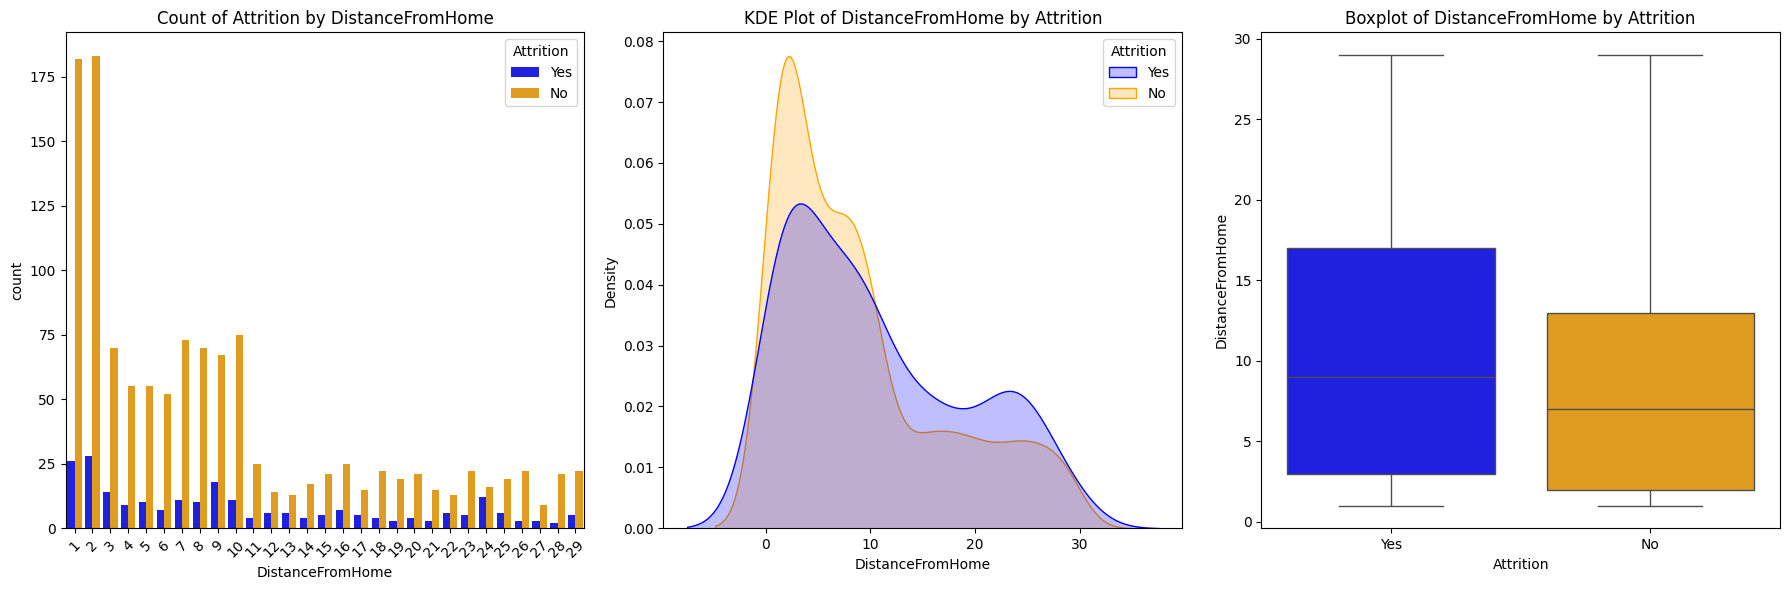

In [12]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='DistanceFromHome', hue='Attrition', palette=custom_palette)
plt.title('Count of Attrition by DistanceFromHome')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.kdeplot(data=df, x='DistanceFromHome', hue='Attrition', fill=True, common_norm=False, palette=custom_palette)
plt.title('KDE Plot of DistanceFromHome by Attrition')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette=custom_palette)
plt.title('Boxplot of DistanceFromHome by Attrition')

plt.tight_layout()
plt.show()

In [13]:
def continuous_bivariate_analysis(feature, df):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x=feature, hue='Attrition', multiple='stack', palette=custom_palette, bins=20)
    plt.title(f'Count of Attrition by {feature}')
    plt.xticks(rotation=45)

    plt.subplot(1, 3, 2)
    sns.kdeplot(data=df, x=feature, hue='Attrition', fill=True, common_norm=False, palette=custom_palette)
    plt.title(f'KDE Plot of {feature} by Attrition')

    plt.subplot(1, 3, 3)
    sns.boxplot(data=df, x='Attrition', y=feature, palette=custom_palette)
    plt.title(f'Boxplot of {feature} by Attrition')

    plt.tight_layout()
    plt.show()

C:\Users\rajar\AppData\Local\Temp\ipykernel_41384\309386127.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=feature, palette=custom_palette)


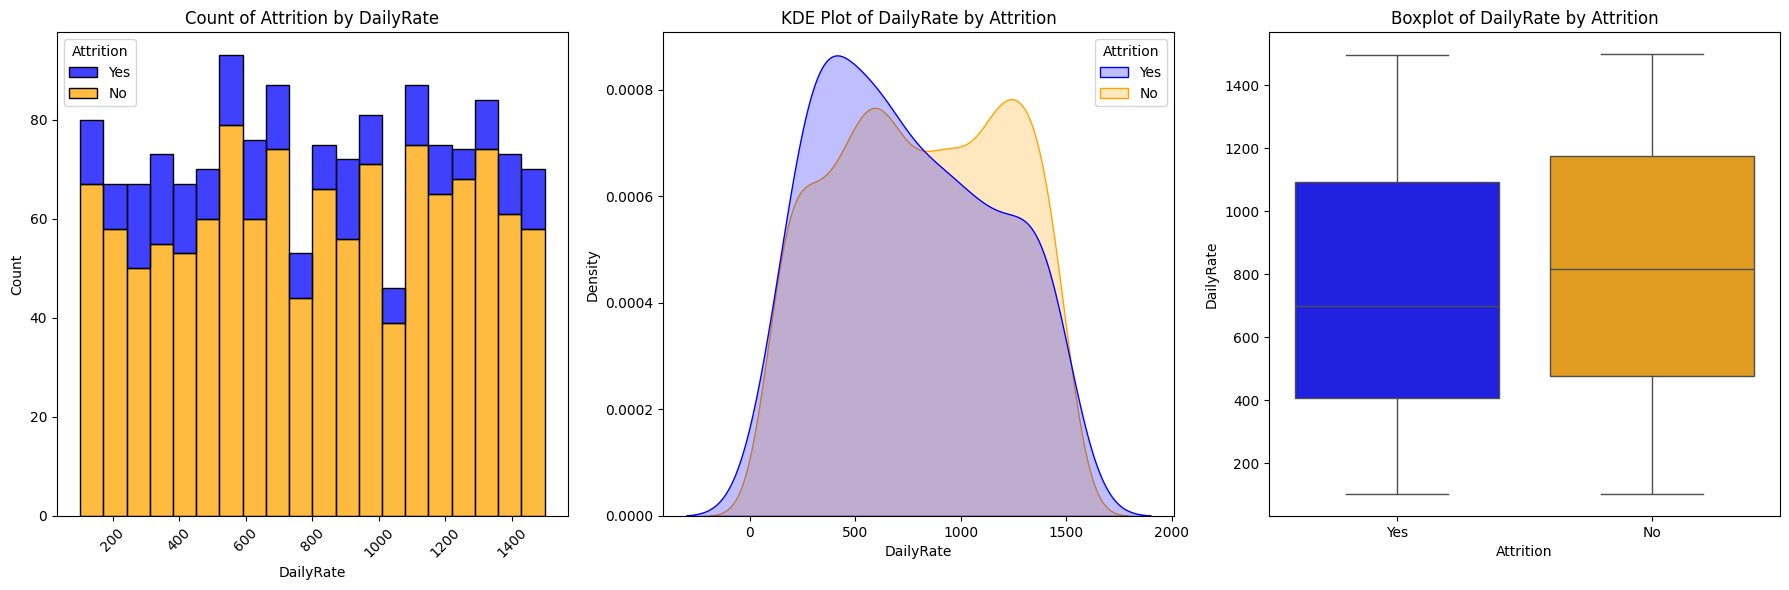

C:\Users\rajar\AppData\Local\Temp\ipykernel_41384\309386127.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=feature, palette=custom_palette)


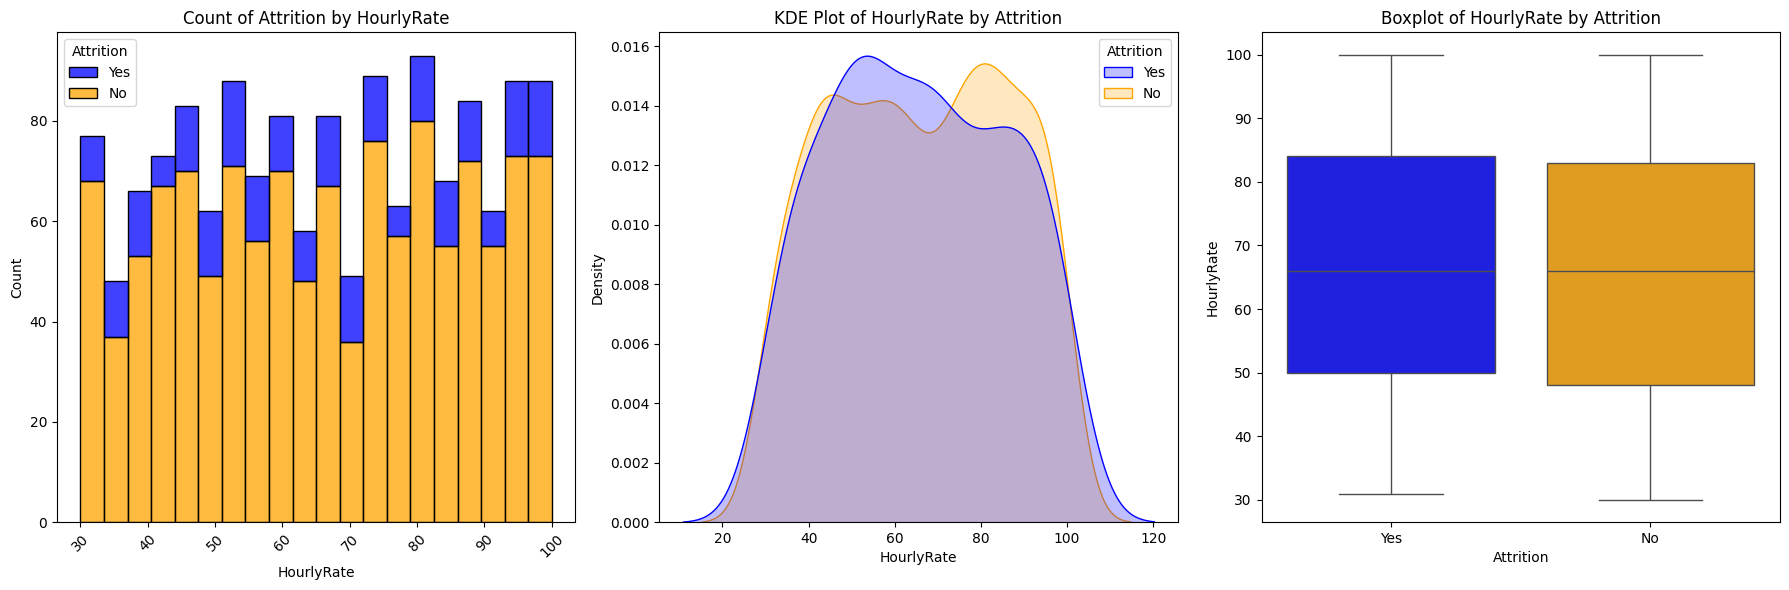

C:\Users\rajar\AppData\Local\Temp\ipykernel_41384\309386127.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=feature, palette=custom_palette)


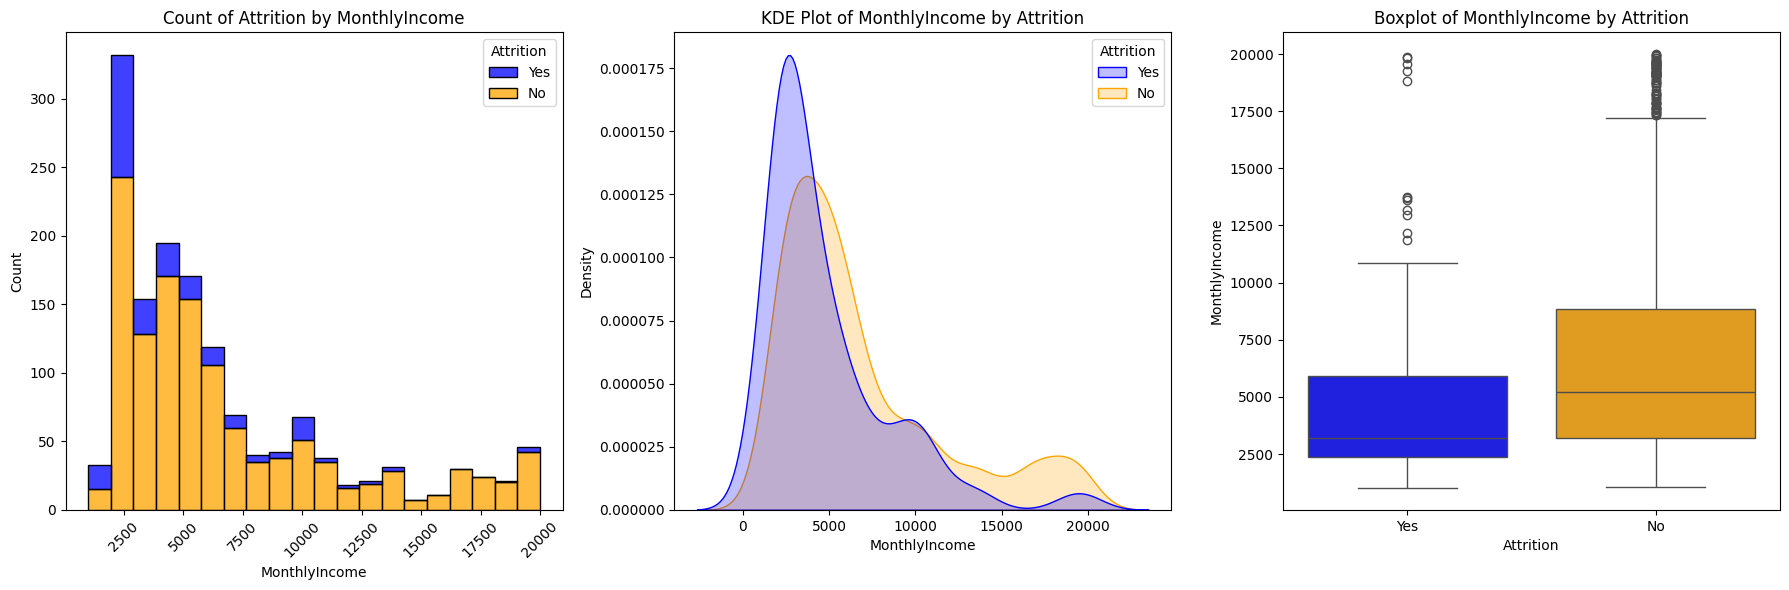

C:\Users\rajar\AppData\Local\Temp\ipykernel_41384\309386127.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=feature, palette=custom_palette)


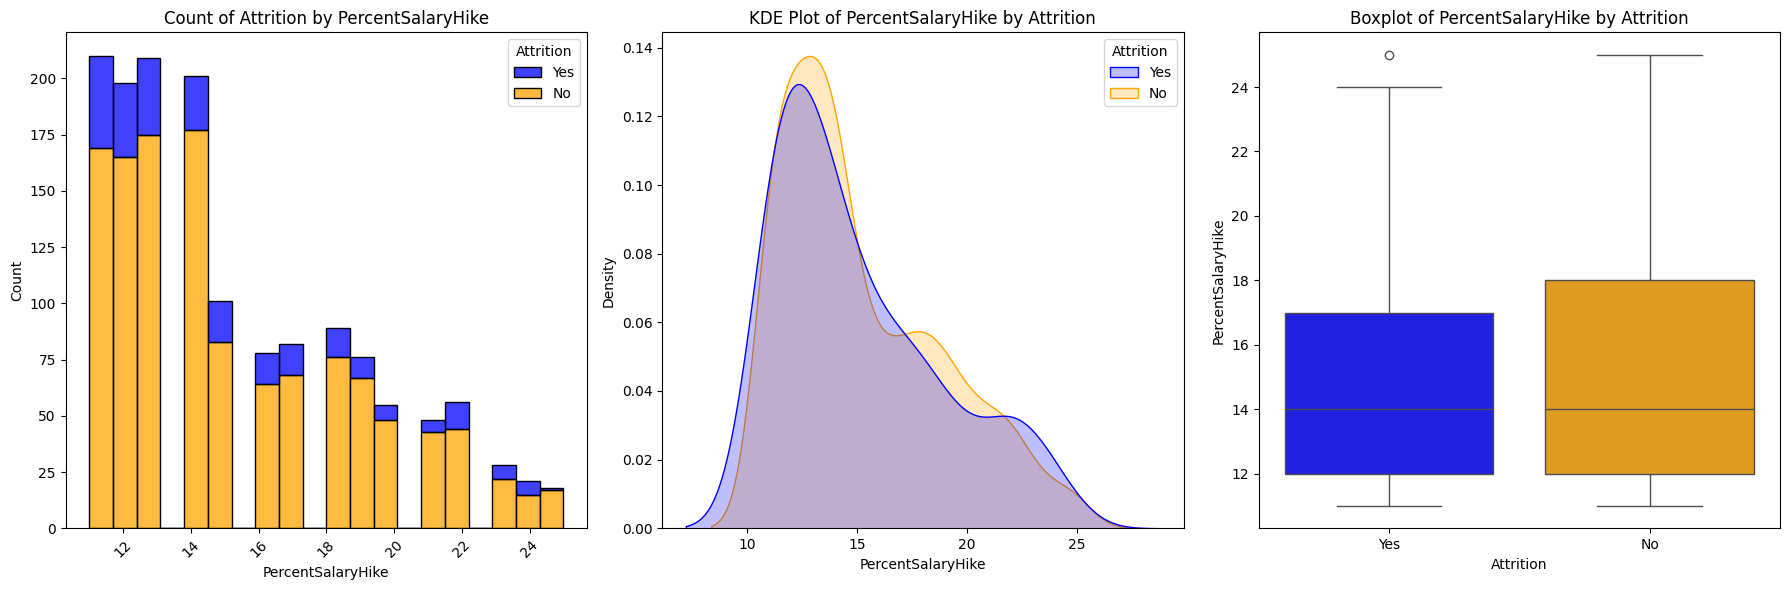

C:\Users\rajar\AppData\Local\Temp\ipykernel_41384\309386127.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=feature, palette=custom_palette)


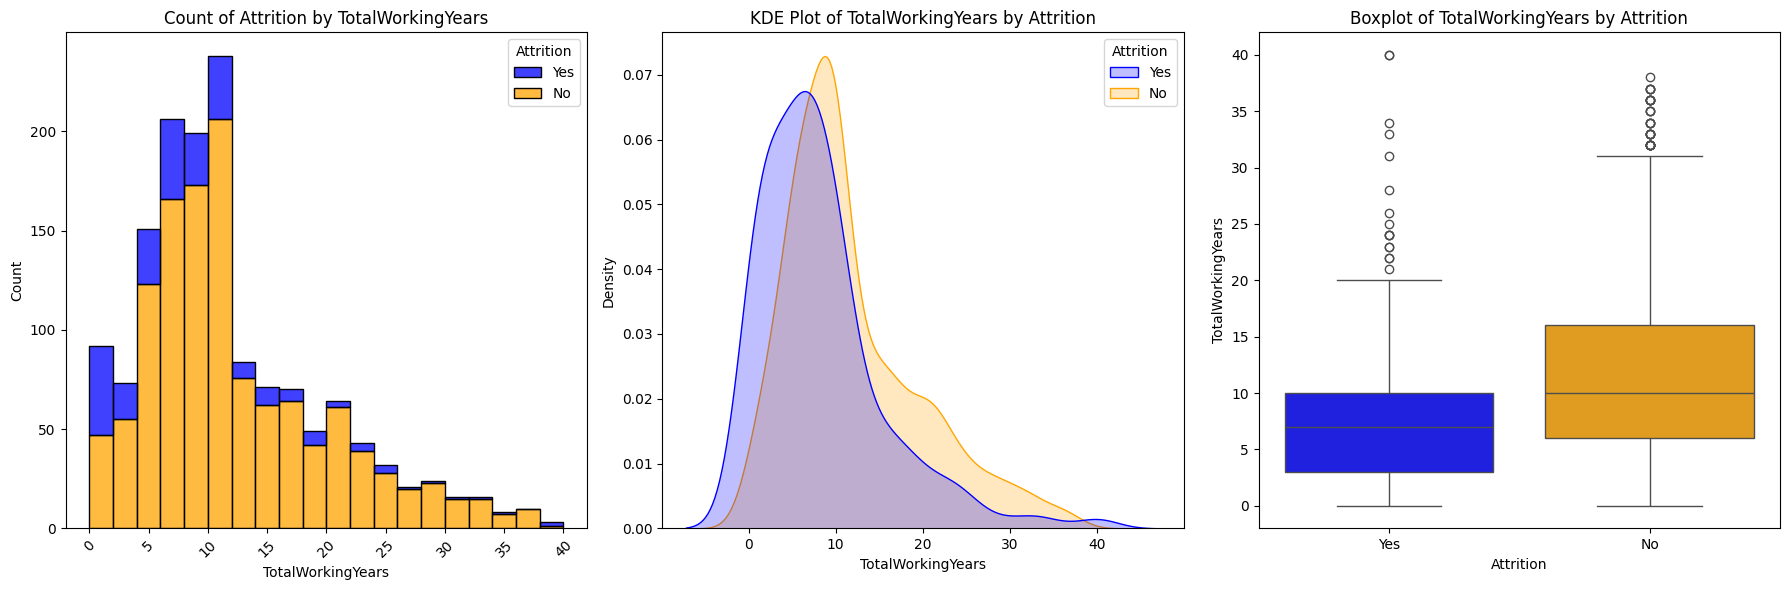

C:\Users\rajar\AppData\Local\Temp\ipykernel_41384\309386127.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=feature, palette=custom_palette)


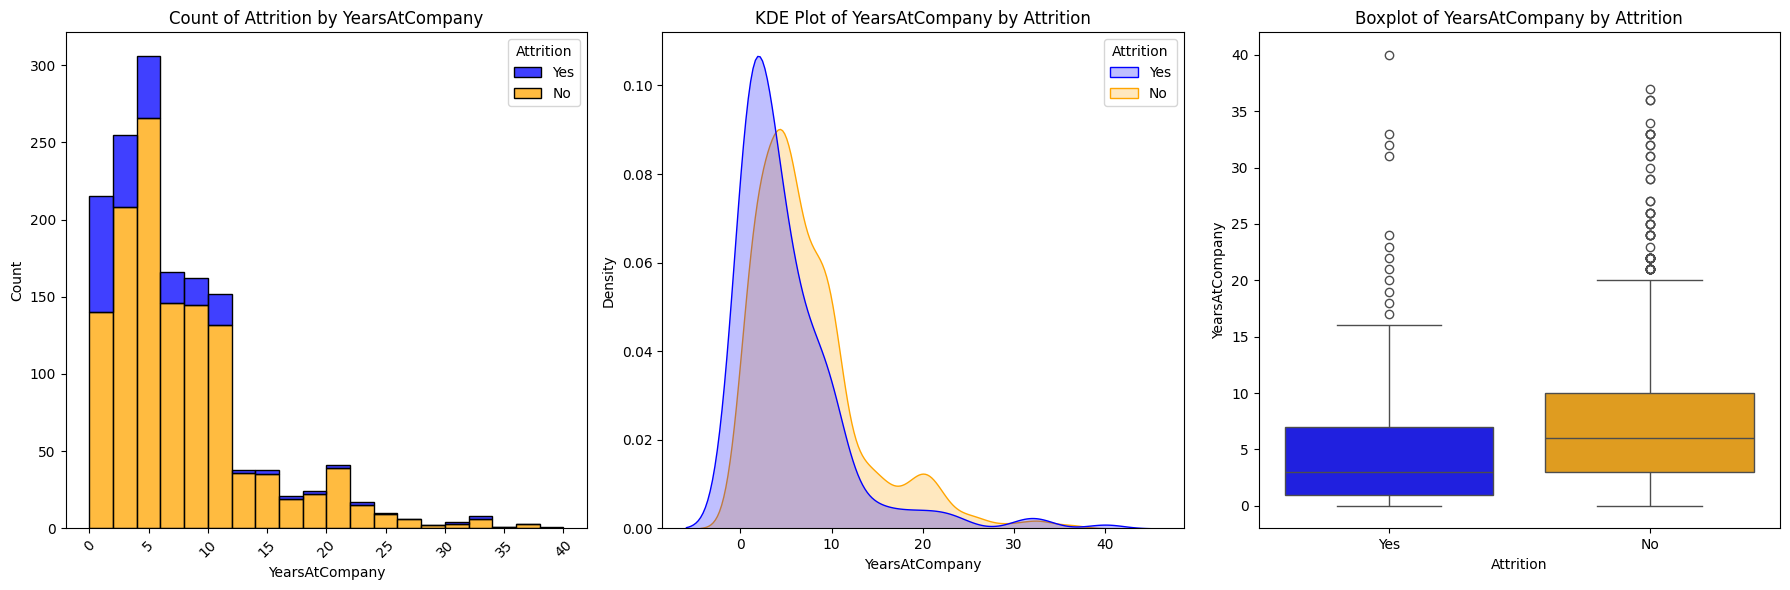

C:\Users\rajar\AppData\Local\Temp\ipykernel_41384\309386127.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=feature, palette=custom_palette)


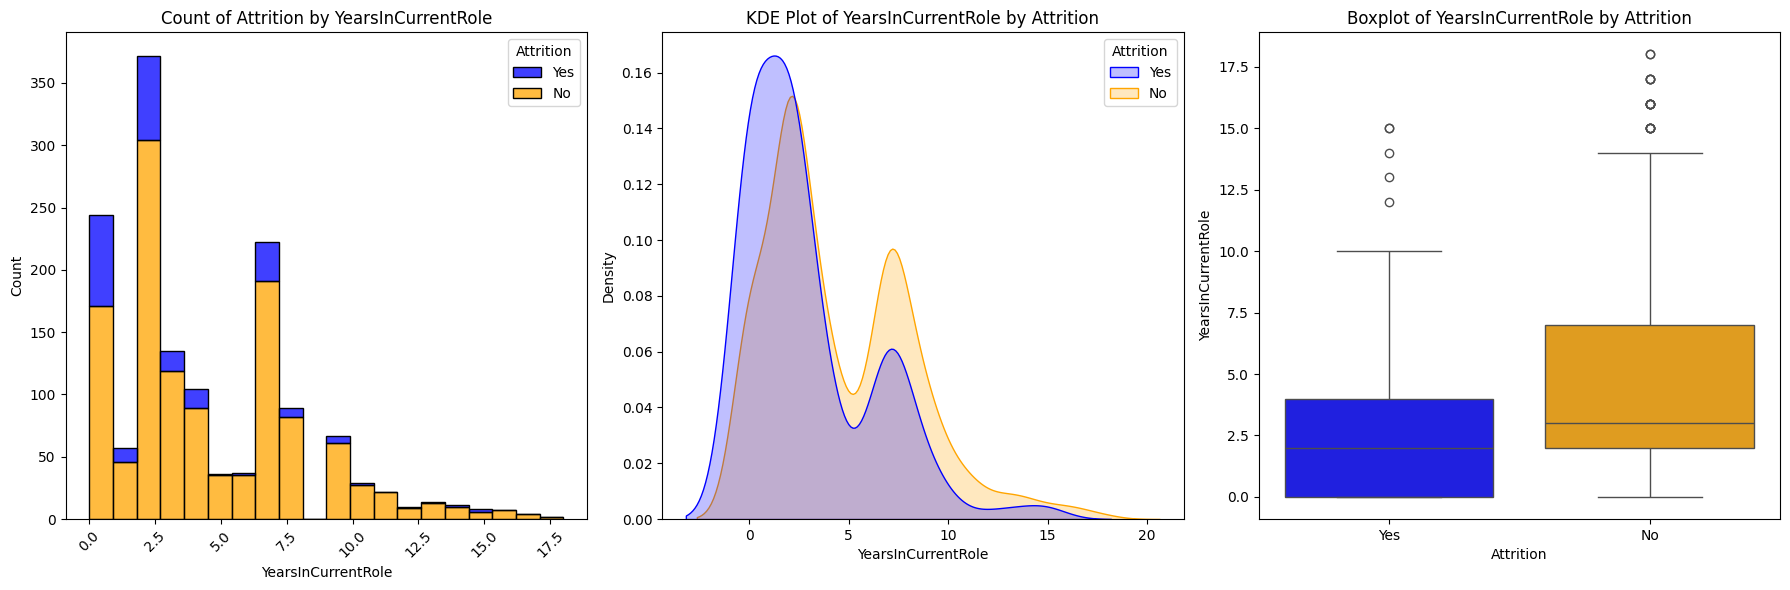

C:\Users\rajar\AppData\Local\Temp\ipykernel_41384\309386127.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=feature, palette=custom_palette)


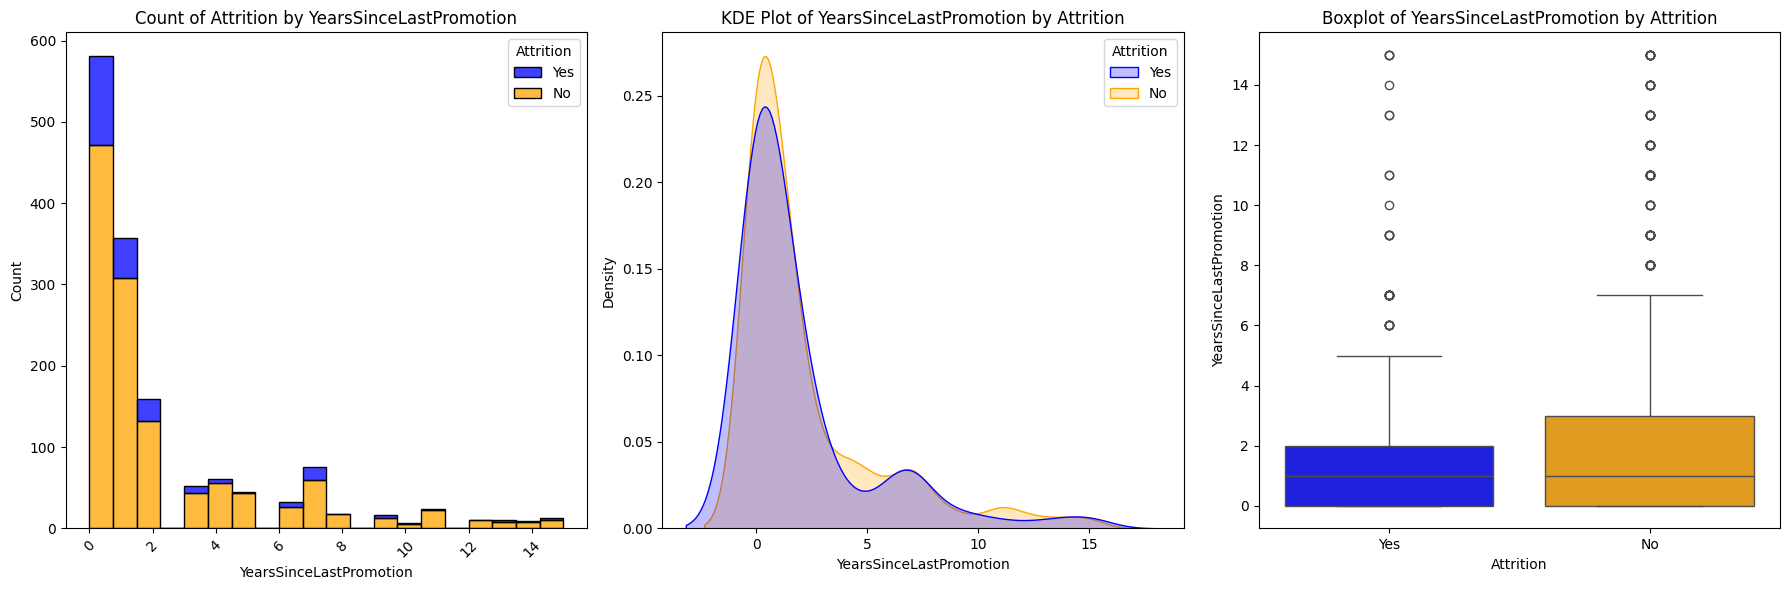

C:\Users\rajar\AppData\Local\Temp\ipykernel_41384\309386127.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=feature, palette=custom_palette)


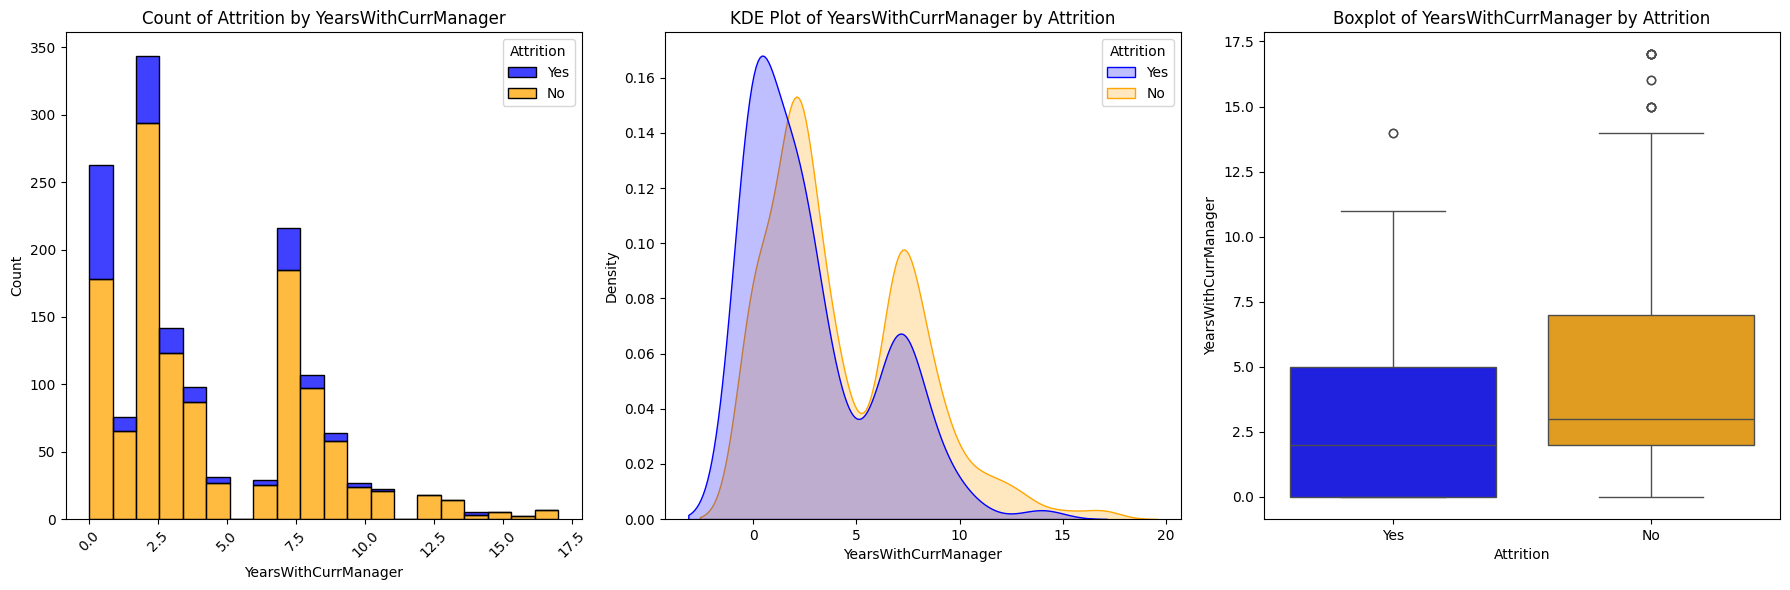

In [14]:
continuous_bivariate_analysis('DailyRate', df)
continuous_bivariate_analysis('HourlyRate', df)
continuous_bivariate_analysis('MonthlyIncome', df)
continuous_bivariate_analysis('PercentSalaryHike', df)
continuous_bivariate_analysis('TotalWorkingYears', df)
continuous_bivariate_analysis('YearsAtCompany', df)
continuous_bivariate_analysis('YearsInCurrentRole', df)
continuous_bivariate_analysis('YearsSinceLastPromotion', df)
continuous_bivariate_analysis('YearsWithCurrManager', df)

### The bivariate analysis reveals key insights into factors influencing employee attrition. Younger employees, particularly in their 20s and early 30s, show higher attrition rates, while older employees, especially those over 40, tend to stay longer. Distance from home also plays a role; employees with shorter commutes (1-5 miles) are less likely to leave, while those living farther away show higher attrition. Lower monthly income is strongly associated with higher attrition, indicating that better compensation may help reduce turnover. Similarly, employees with fewer total working years, less tenure at the company, or fewer years in their current role exhibit higher attrition rates, suggesting that early career support and career development can improve retention. Moreover, a longer period since the last promotion and shorter tenure with the current manager correlate with higher attrition, highlighting the importance of career progression and strong manager-employee relationships.

### After above intensive bivariate analysis, it is clear that, DailyRate, HourlyRate, and PercentSalaryHike should not be included in further analysis because, they do not show meaningful differences between the attrition groups. For DailyRate and HourlyRate, both the KDE and box plots indicate nearly identical distributions for employees who left and those who stayed, suggesting no significant relationship with attrition. Similarly, PercentSalaryHike shows overlapping density curves and similar medians across groups, indicating that the percentage increase in salary is not a differentiating factor for employee turnover. Including these features in the model would add noise without contributing predictive value, as they lack a clear and distinct relationship with the target variable, Attrition.

In [15]:
def bivariate_analysis(feature, df):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=feature, hue='Attrition', palette=custom_palette)
    plt.title(f'Count of Attrition by {feature}')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    attrition_counts = df[df['Attrition'] == 'Yes'][feature].value_counts()
    total_counts = df[feature].value_counts()
    attrition_percentage = (attrition_counts / total_counts) * 100

    plt.pie(attrition_percentage, labels=attrition_percentage.index, autopct='%1.1f%%', colors=sns.color_palette('tab10'))
    plt.title(f'Percentage of Attrition by {feature}')

    plt.tight_layout()
    plt.show()

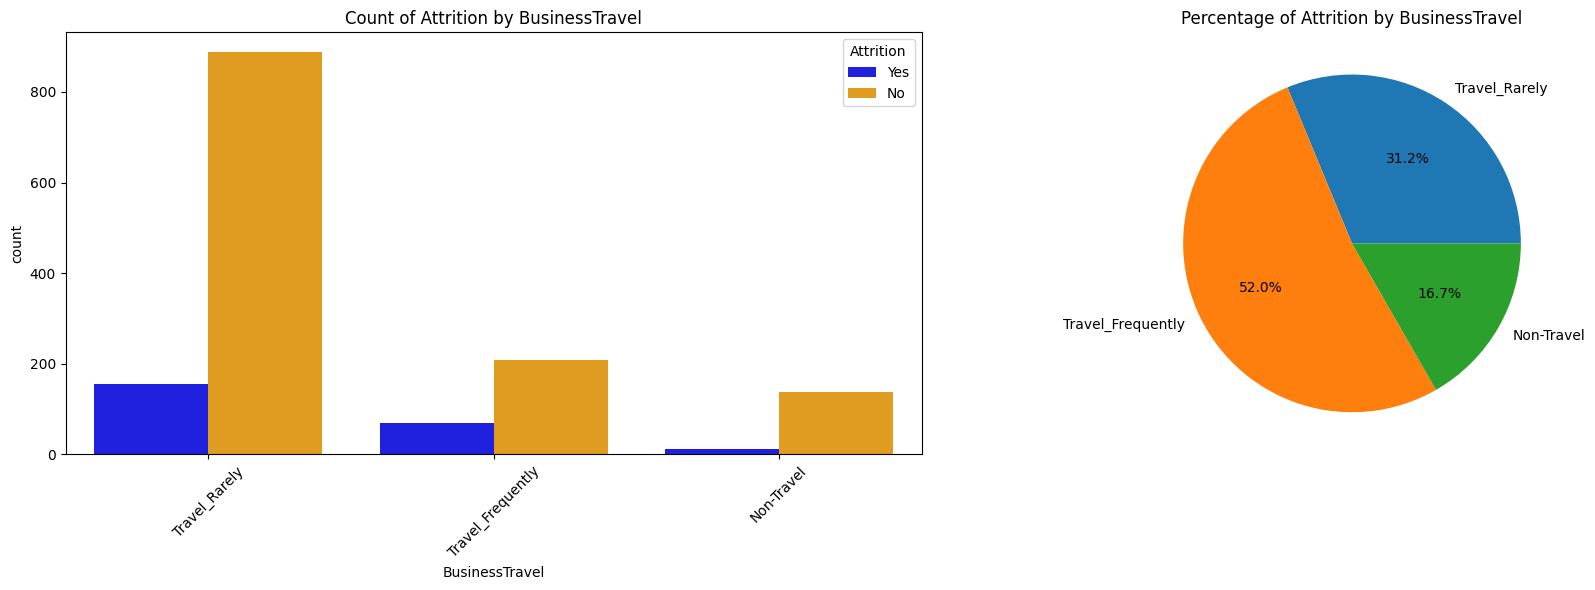

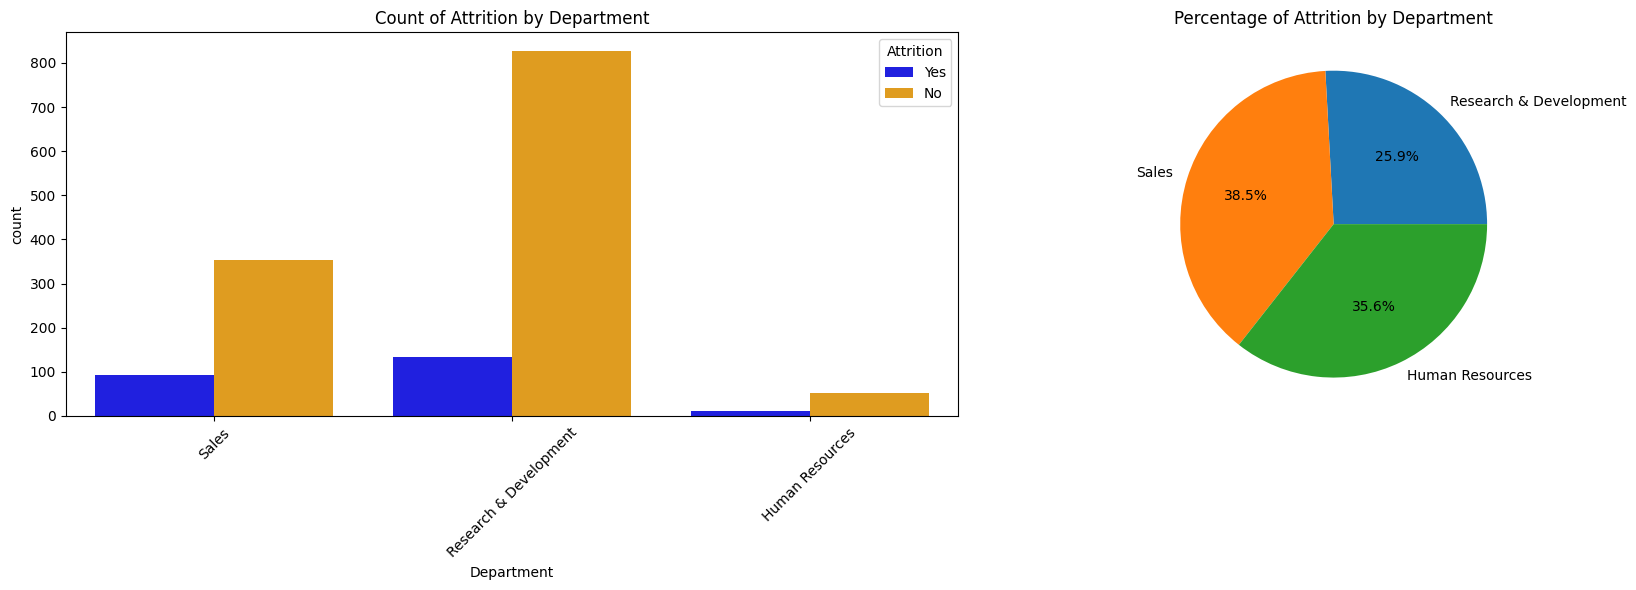

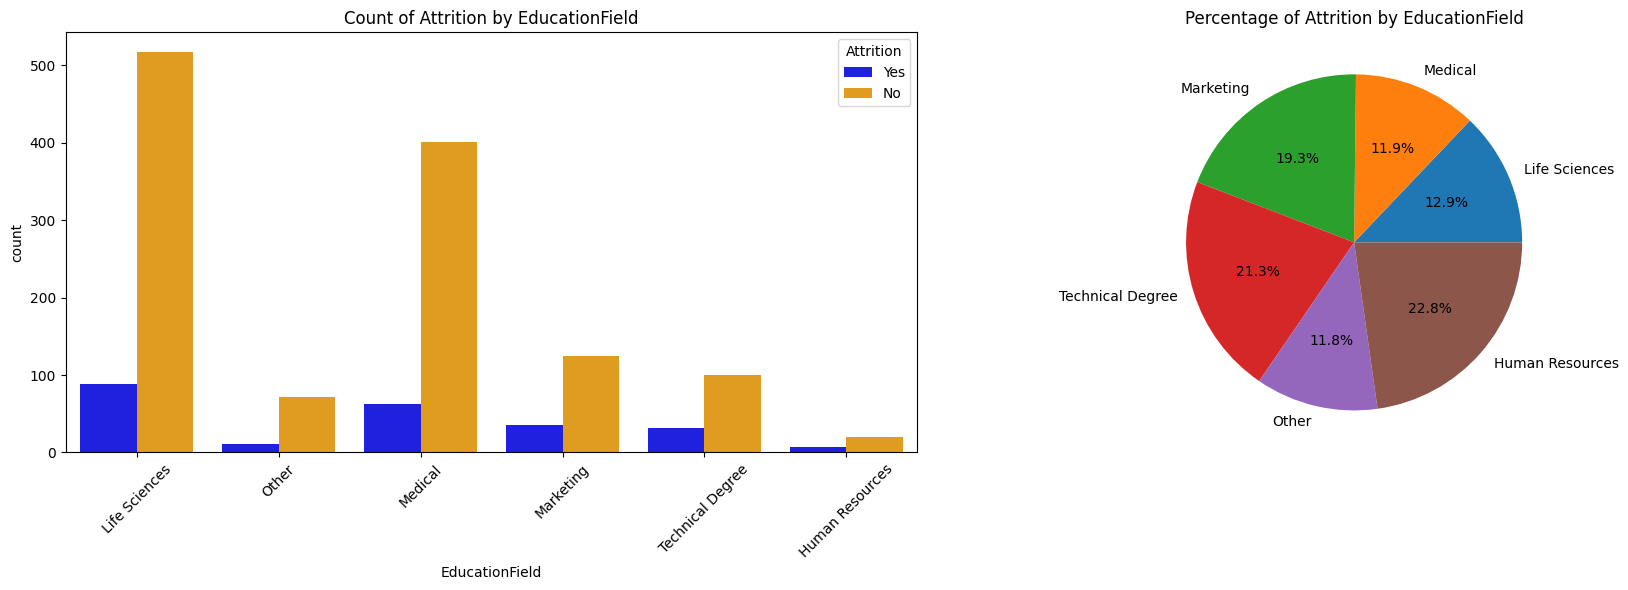

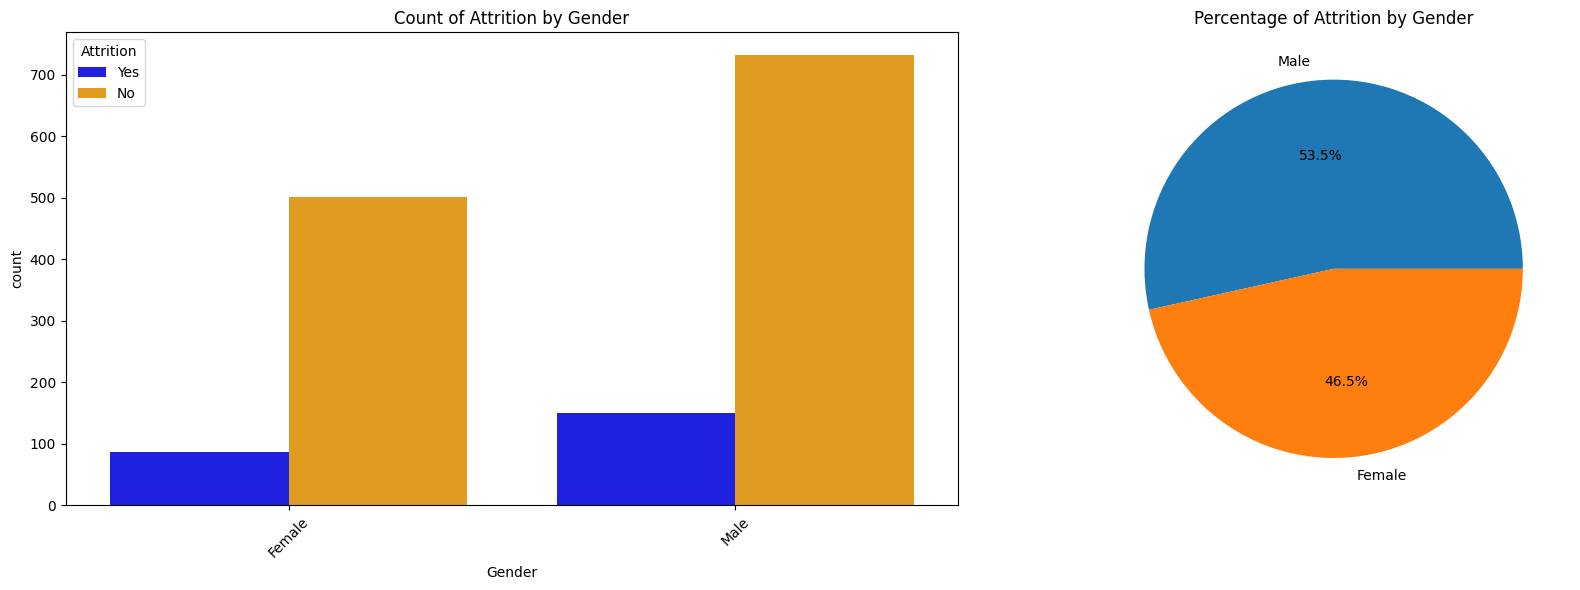

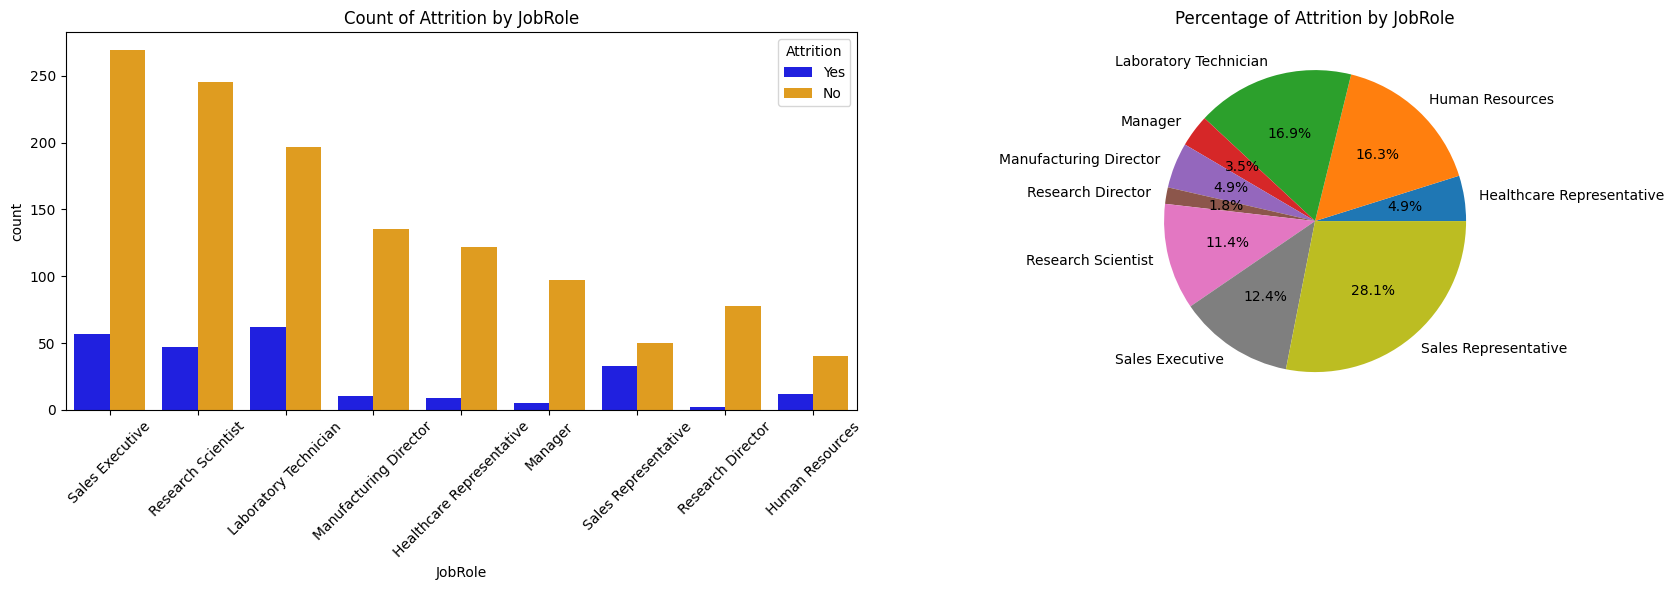

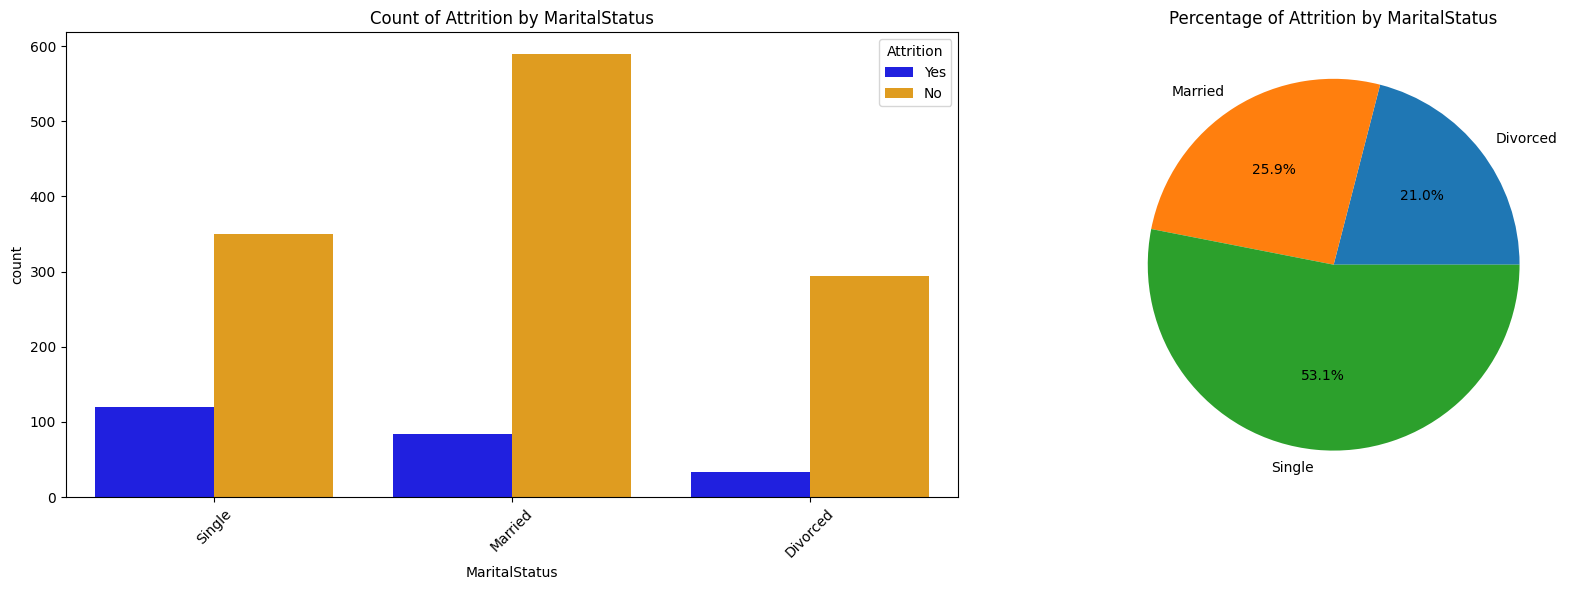

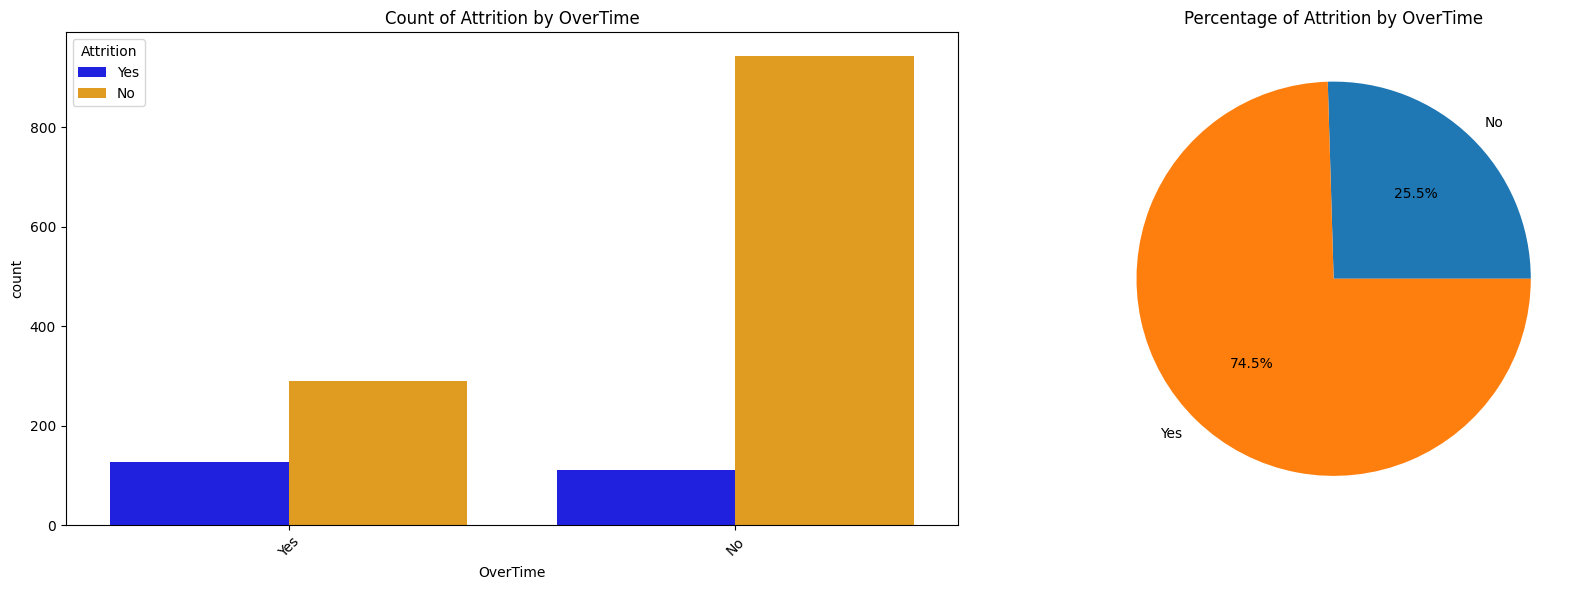

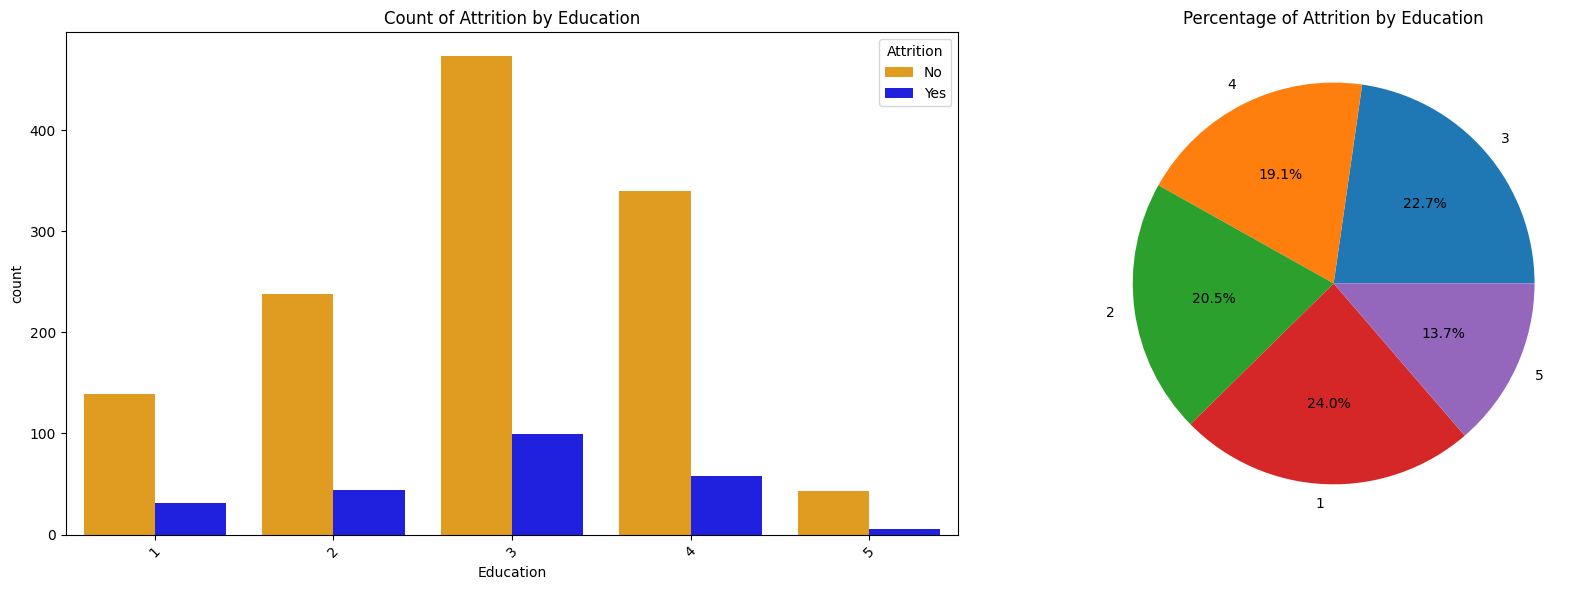

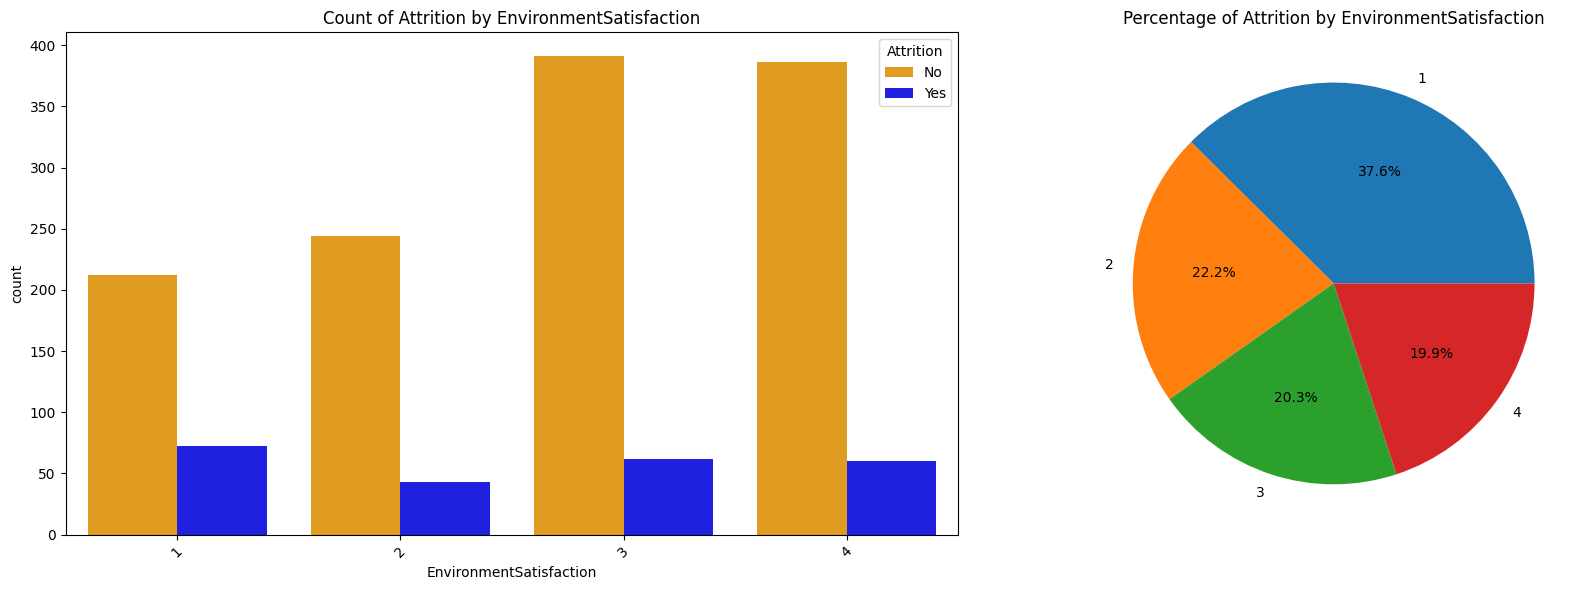

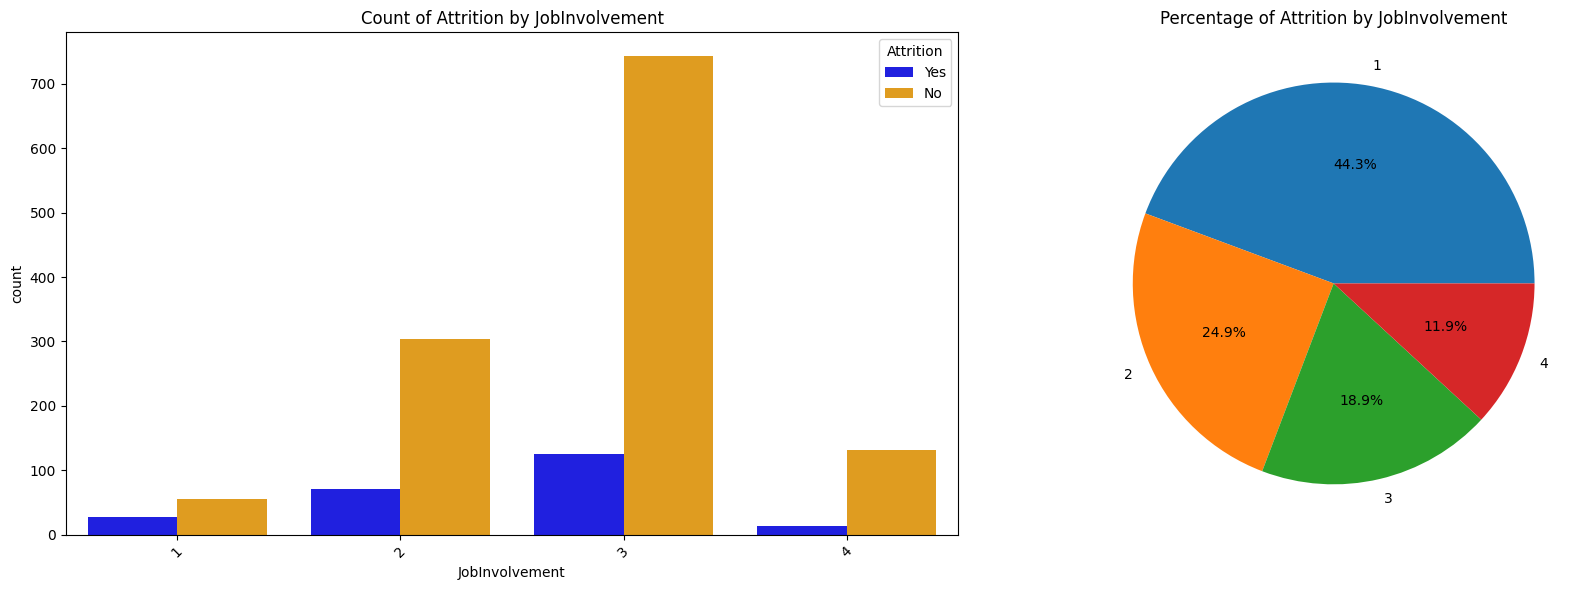

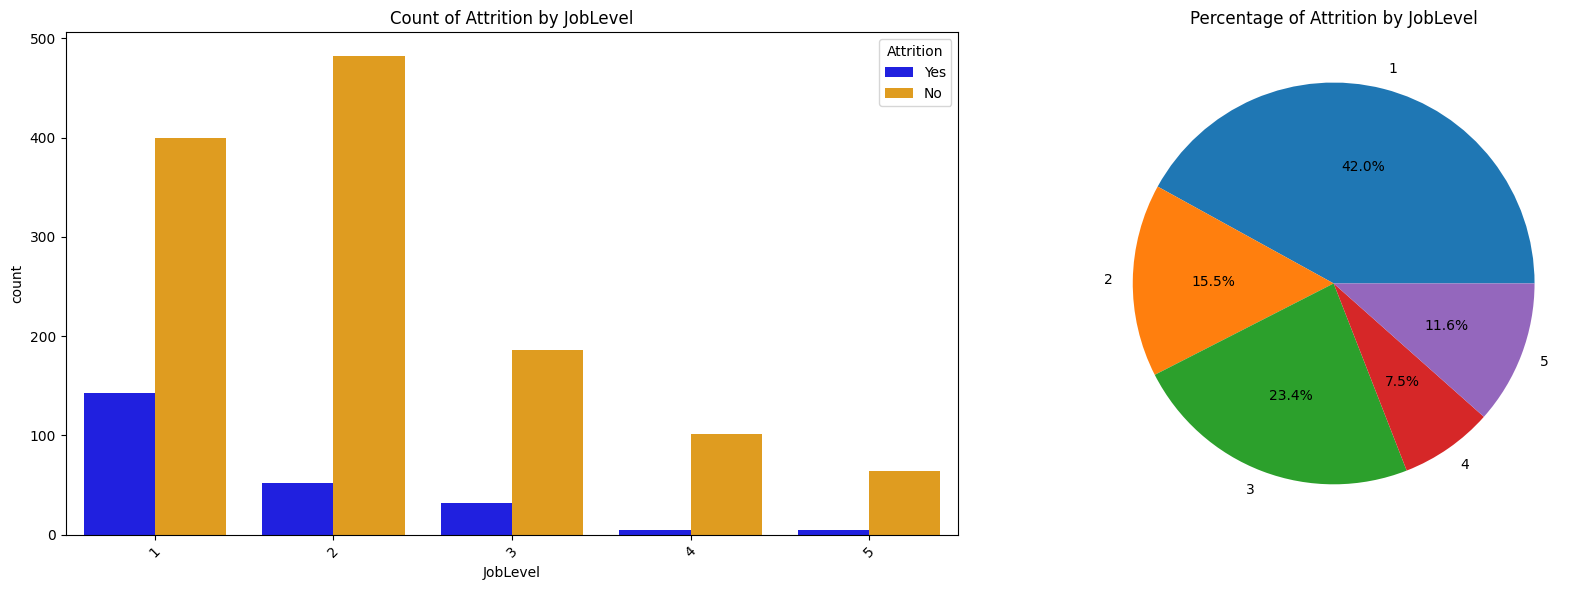

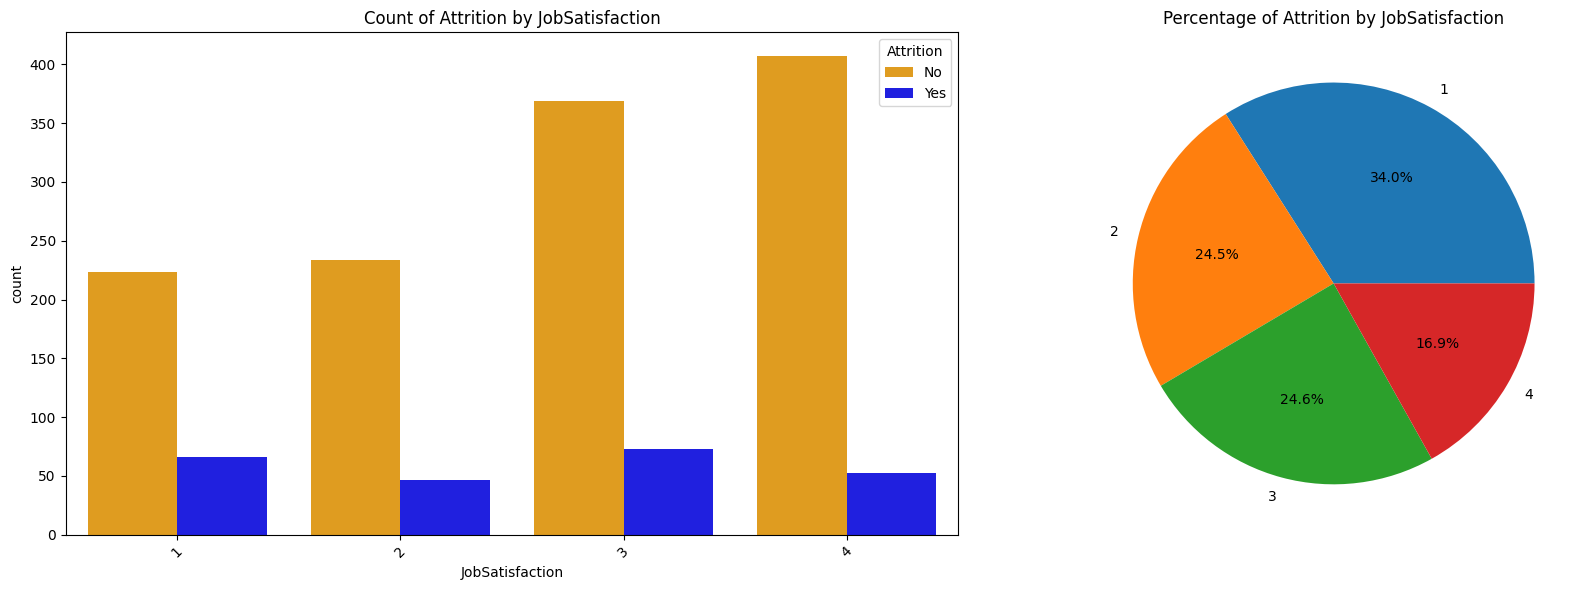

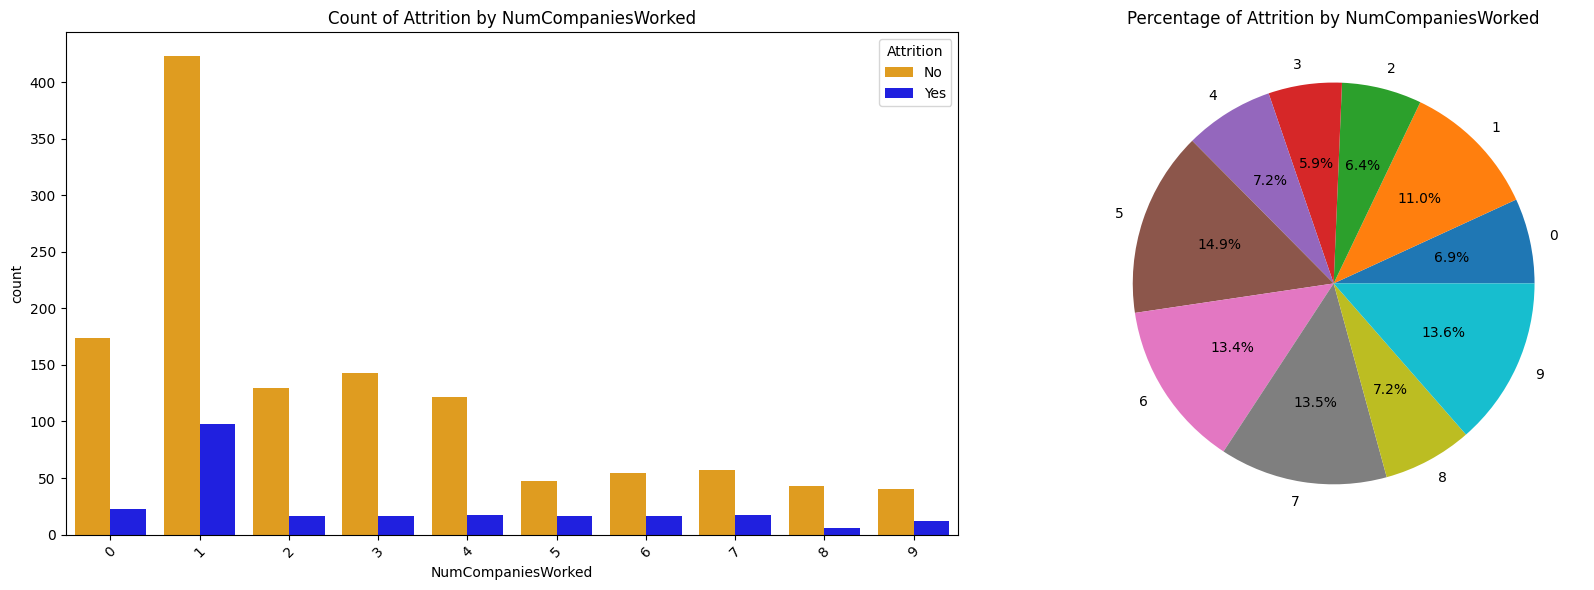

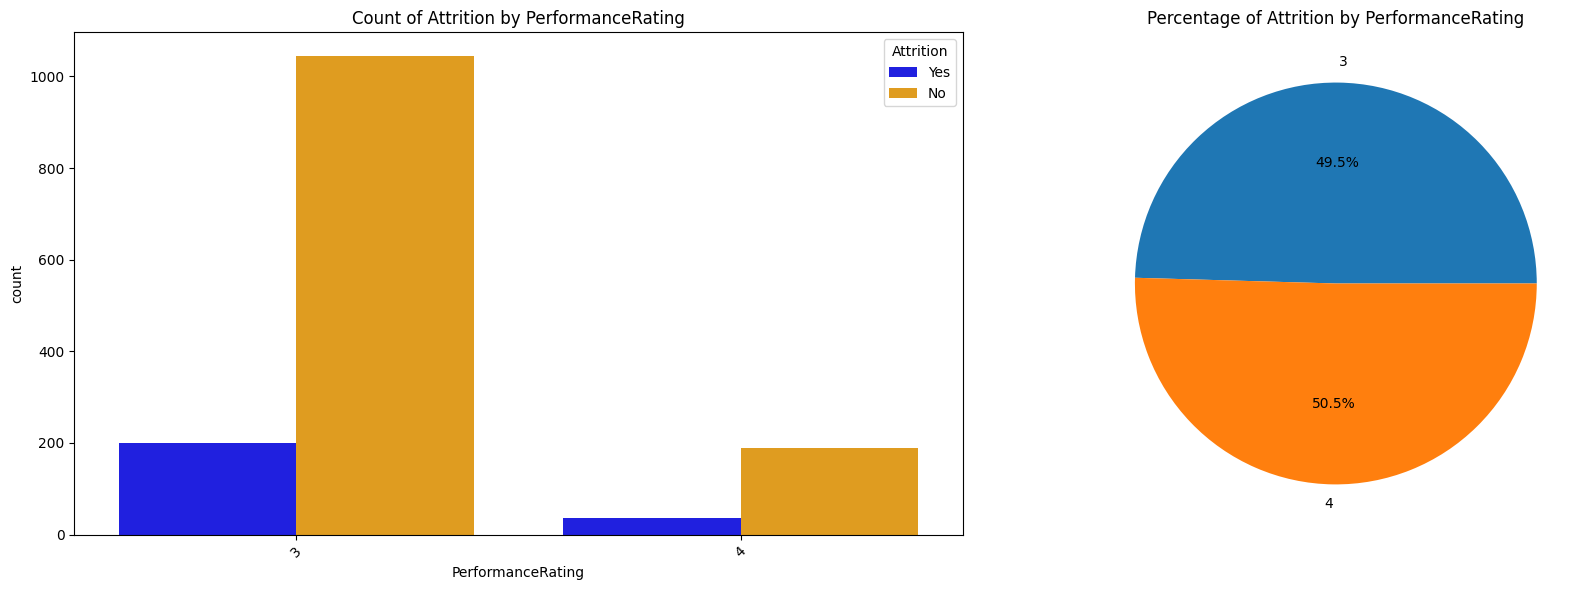

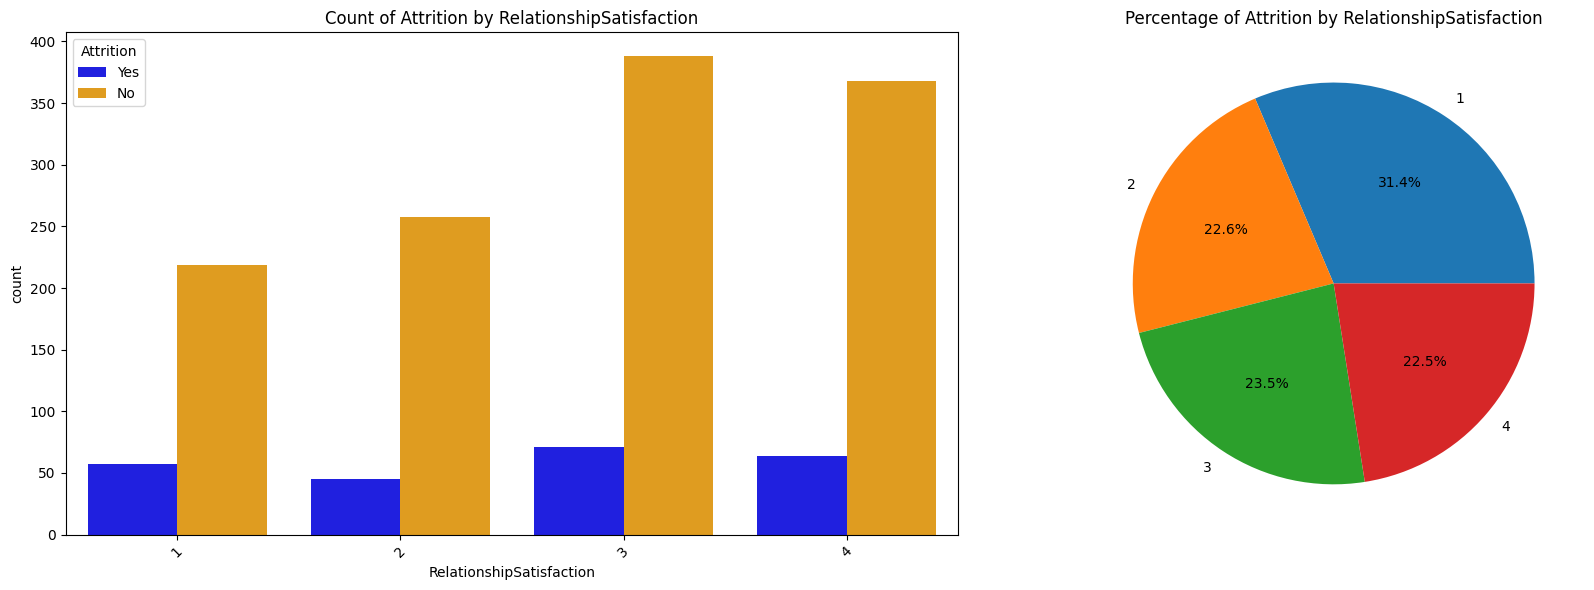

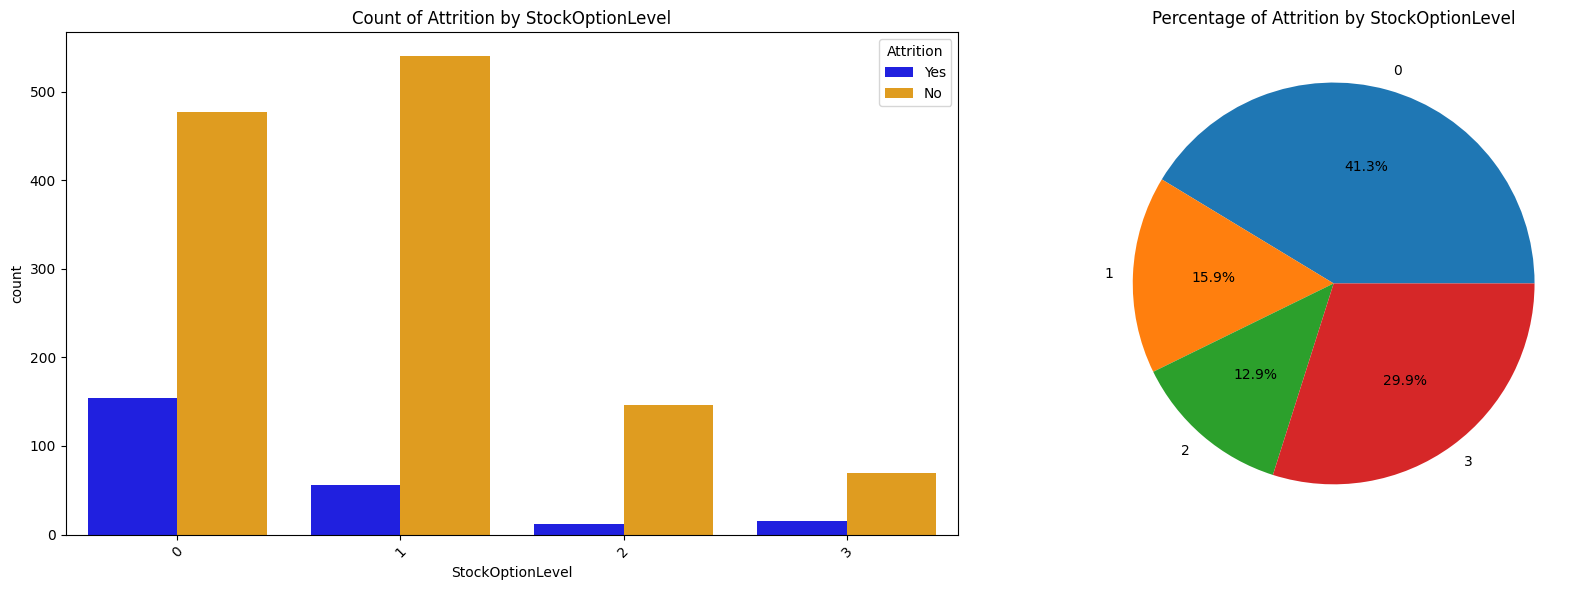

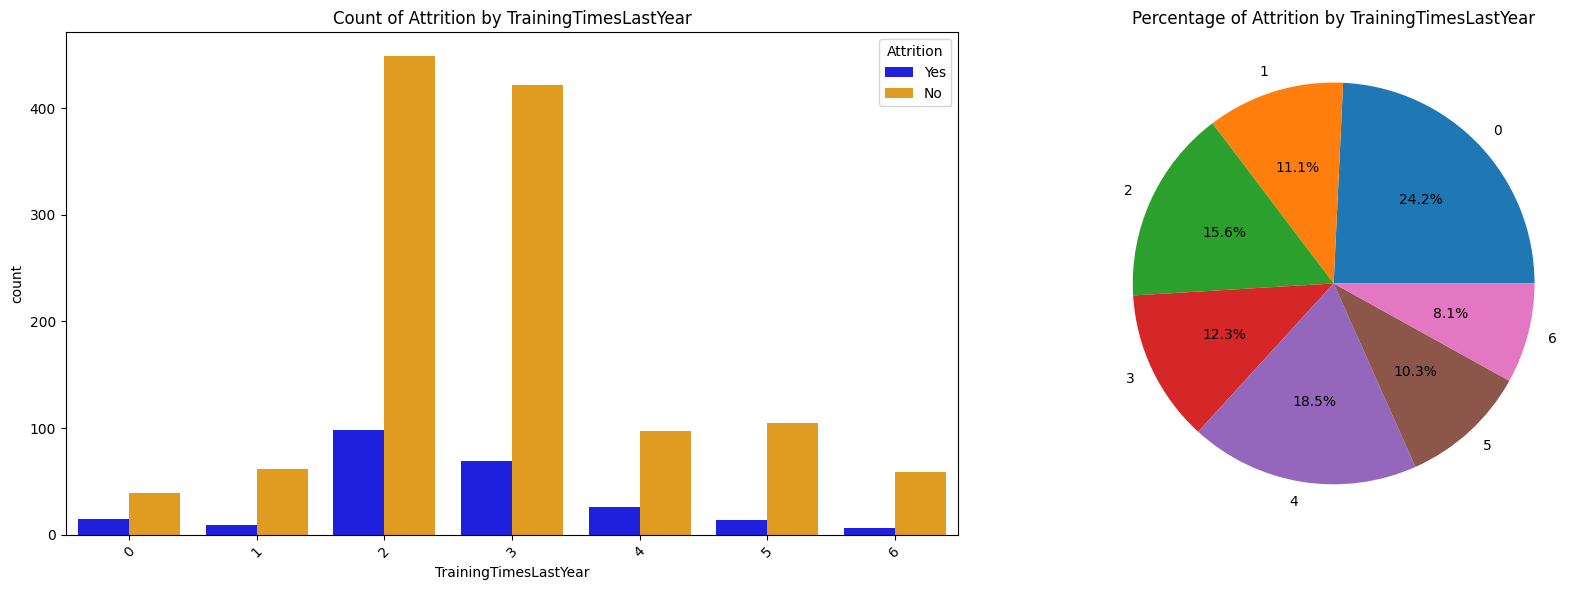

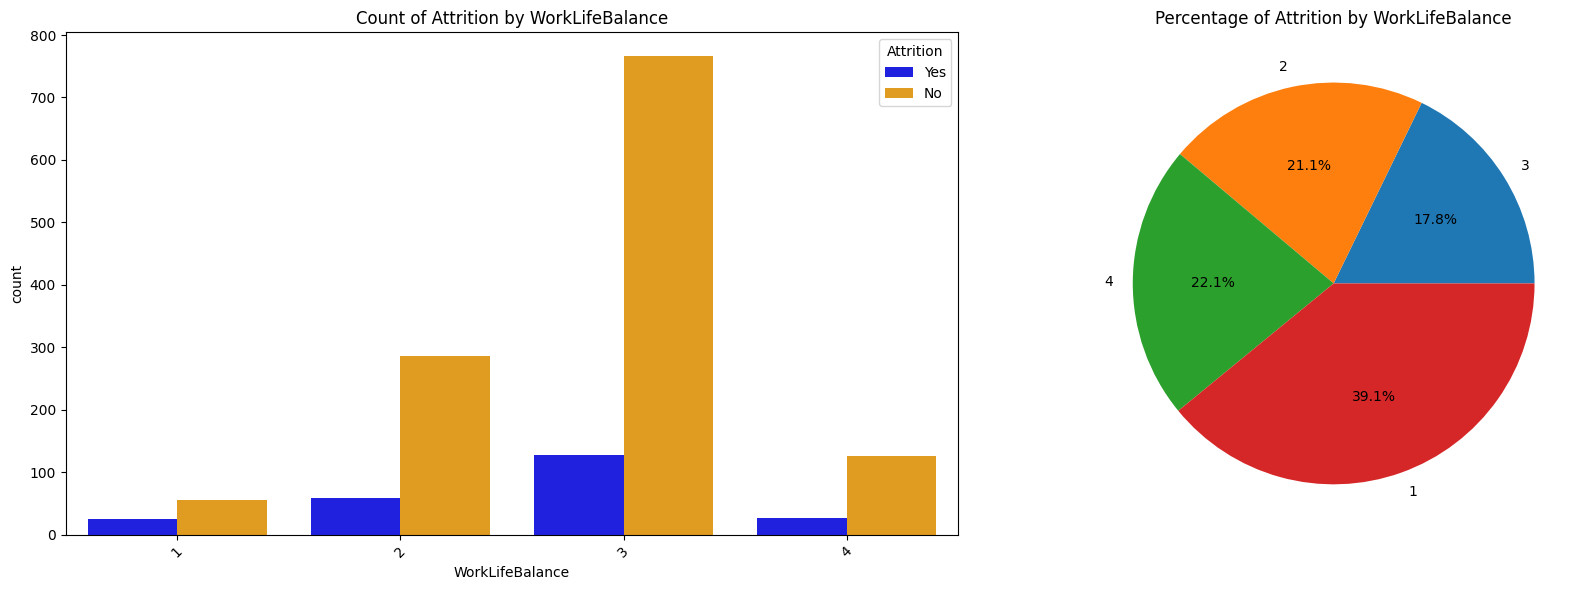

In [16]:
bivariate_analysis('BusinessTravel', df)
bivariate_analysis('Department', df)
bivariate_analysis('EducationField', df)
bivariate_analysis('Gender', df)
bivariate_analysis('JobRole', df)
bivariate_analysis('MaritalStatus', df)
bivariate_analysis('OverTime', df)
bivariate_analysis('Education', df)
bivariate_analysis('EnvironmentSatisfaction', df)
bivariate_analysis('JobInvolvement', df)
bivariate_analysis('JobLevel', df)
bivariate_analysis('JobSatisfaction', df)
bivariate_analysis('NumCompaniesWorked', df)
bivariate_analysis('PerformanceRating', df)
bivariate_analysis('RelationshipSatisfaction', df)
bivariate_analysis('StockOptionLevel', df)
bivariate_analysis('TrainingTimesLastYear', df)
bivariate_analysis('WorkLifeBalance', df)

### The bivariate analysis of categorical features reveals several key factors influencing employee attrition. Low levels of environment satisfaction, job involvement, job satisfaction, work-life balance, and stock options are associated with higher turnover rates, suggesting that improving these areas could help retain employees. Employees in lower job levels, those who travel frequently for business, or work overtime also show higher attrition, indicating the need for better work-life balance, job role enhancement, and support for frequent travelers and overtime workers.

### Higher attrition is observed among single employees, those with extensive job-hopping history, and certain job roles such as Sales Representatives, Laboratory Technicians, and Human Resources. Tailored retention strategies focused on these groups, such as career development, role-specific incentives, and fostering a sense of belonging, could be effective.

### After a thorough bivariate analysis of categorical and continuous features with Attrition, we have decided to drop the following features due to their minimal predictive power: DailyRate, HourlyRate, PercentSalaryHike, Education, PerformanceRating, RelationshipSatisfaction, and Gender. These features showed little variation in attrition rates or lacked meaningful correlation with employee turnover, making them less useful for modeling.

In [17]:
features_to_drop = ['DailyRate', 'HourlyRate', 'PercentSalaryHike', 'Education', 'PerformanceRating', 'RelationshipSatisfaction', 'Gender']
df.drop(columns=features_to_drop, inplace=True)
df.shape

(1470, 24)

## Encoding Categorical Data

In [23]:
from sklearn.preprocessing import OneHotEncoder

nominal_features = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

# Initialize OneHotEncoder with the correct argument
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the nominal features
encoded_features = encoder.fit_transform(df[nominal_features])

# Get the encoded feature names
encoded_feature_names = encoder.get_feature_names_out(nominal_features)

# Convert encoded features to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Concatenate the encoded features with the original DataFrame
df = pd.concat([df.drop(columns=nominal_features), encoded_df], axis=1)

# Encode binary features directly in the DataFrame
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Display the first few rows of the updated DataFrame
df.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,3,2,4,5993,19479,8,1,0,8,0,1,6,4,0,5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49,0,8,3,2,2,2,5130,24907,1,0,1,10,3,3,10,7,1,7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,2,4,2,1,3,2090,2396,6,1,0,7,3,3,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,3,4,3,1,3,2909,23159,1,1,0,8,3,3,8,7,3,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27,0,2,1,3,1,2,3468,16632,9,0,1,6,3,3,2,2,2,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Scalling the Dataset

In [24]:
# scaling the continuous features using min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
available_continuous_features = [
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 
    'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]
df[available_continuous_features] = scaler.fit_transform(df[available_continuous_features])
df.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,1,0.000000,2,3,2,4,0.262454,0.698053,8,1,0,0.200,0,1,0.15,0.222222,0.000000,0.294118,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.738095,0,0.250000,3,2,2,2,0.217009,0.916001,1,0,1,0.250,3,3,0.25,0.388889,0.066667,0.411765,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.452381,1,0.035714,4,2,1,3,0.056925,0.012126,6,1,0,0.175,3,3,0.00,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0,0.071429,4,3,1,3,0.100053,0.845814,1,1,0,0.200,3,3,0.20,0.388889,0.200000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.214286,0,0.035714,1,3,1,2,0.129489,0.583738,9,0,1,0.150,3,3,0.05,0.111111,0.133333,0.117647,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
#save the cleaned data
df.to_csv('cleaned_data.csv', index=False)

## Modeling

### Lets make train test split without balancing the dataset, so that we can access how some models can perform with and without balancing. Specially which are not sensitive to imbalanced dataset.
### And also after training model on balanced dataset I will apply it on our original y_test, to check performance.

### Splitting the dataset into feature and target

In [25]:
X = df.drop(columns='Attrition')
y = df['Attrition']

### Split the data into training and testing sets

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(y_test))

294


### As we know that our data is imbalanced, we need to make it balanced for better predictions.

In [37]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(sampling_strategy=0.5, random_state=42) 
X_smote, y_smote = smote.fit_resample(X, y)

rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_balanced, y_balanced = rus.fit_resample(X_smote, y_smote)
balanced_df = pd.concat([X_balanced, y_balanced], axis=1)

In [43]:
balanced_df['Attrition'].value_counts()

Attrition
0    616
1    616
Name: count, dtype: int64

In [40]:
X_b = balanced_df.drop(columns='Attrition')
y_b = balanced_df['Attrition']

1232


In [39]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)

247


### Logistic Regression with imbalanced dataset.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
model_Lr_1 = LogisticRegression()
model_Lr_1.fit(X_train, y_train)

y_pred_Lr_1 = model_Lr_1.predict(X_test)

Accuracy 88.77551020408163 %
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.64      0.36      0.46        39

    accuracy                           0.89       294
   macro avg       0.77      0.66      0.70       294
weighted avg       0.87      0.89      0.87       294



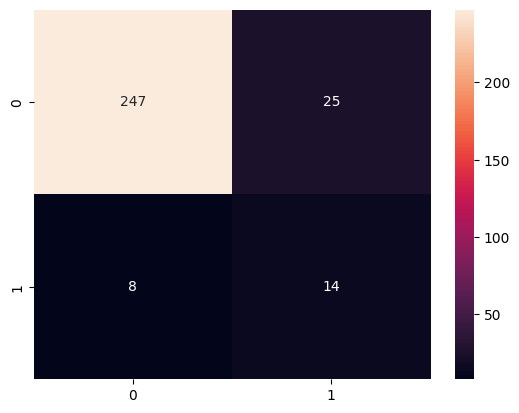

In [45]:
cm = confusion_matrix(y_pred_Lr_1, y_test)
sns.heatmap(cm, annot=True, fmt='d')
print("Accuracy {} %".format( 100 * accuracy_score(y_pred_Lr_1, y_test)))
print(classification_report(y_test, y_pred_Lr_1))

### Logistic Regression with balanced dataset.

Accuracy 80.61224489795919 %
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       255
           1       0.38      0.74      0.50        39

    accuracy                           0.81       294
   macro avg       0.67      0.78      0.69       294
weighted avg       0.88      0.81      0.83       294



c:\Users\rajar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


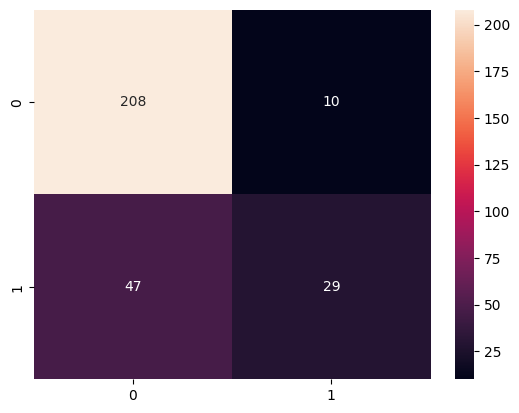

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model_Lr_balanced = LogisticRegression()
model_Lr_balanced.fit(X_train_b, y_train_b)

y_pred_balanced = model_Lr_balanced.predict(X_test)
cm = confusion_matrix(y_pred_balanced, y_test)
sns.heatmap(cm, annot=True, fmt='d')
print("Accuracy {} %".format( 100 * accuracy_score(y_pred_balanced, y_test)))
print(classification_report(y_test, y_pred_balanced))

### The model trained on the balanced dataset is better in terms of Recall and F1-Score, the most relevant metrics for this imbalanced problem. In other words, the balanced model is better at catching the actual attrition cases which is critical.

### Now lets apply random forest model, which is good at handling class imbalance, but still I will check it with balanced dataset.

### Random Forest without balanced dataset

Accuracy 87.75510204081633 %
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



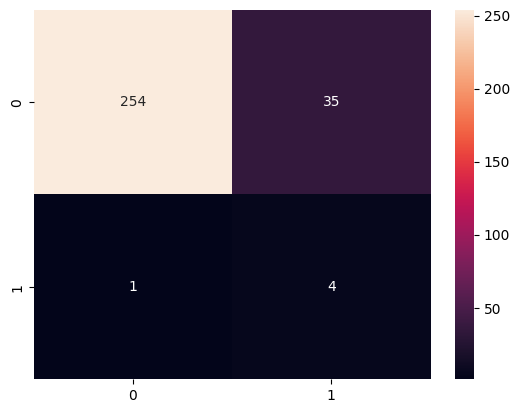

In [47]:
from sklearn.ensemble import RandomForestClassifier

model_Rf_1 = RandomForestClassifier()
model_Rf_1.fit(X_train, y_train)
y_pred_Rf_1 = model_Rf_1.predict(X_test)

cm = confusion_matrix(y_pred_Rf_1, y_test)
sns.heatmap(cm, annot=True, fmt='d')
print("Accuracy {} %".format( 100 * accuracy_score(y_pred_Rf_1, y_test)))
print(classification_report(y_test, y_pred_Rf_1))

### Random Forest with balanced dataset

Accuracy 90.47619047619048 %
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       255
           1       0.59      0.95      0.73        39

    accuracy                           0.90       294
   macro avg       0.79      0.92      0.83       294
weighted avg       0.94      0.90      0.91       294



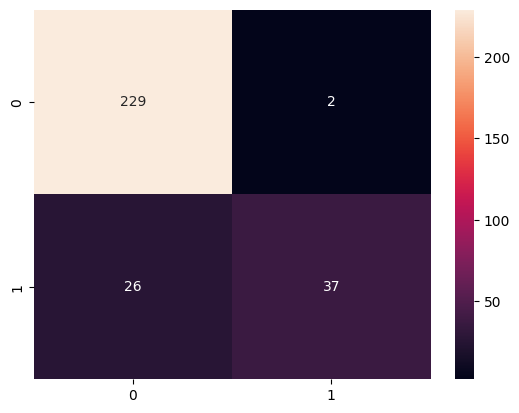

In [48]:
model_Rf_balanced = RandomForestClassifier()
model_Rf_balanced.fit(X_train_b, y_train_b)
y_pred_Rf_balanced = model_Rf_balanced.predict(X_test)

cm = confusion_matrix(y_pred_Rf_balanced, y_test)
sns.heatmap(cm, annot=True, fmt='d')
print("Accuracy {} %".format( 100 * accuracy_score(y_pred_Rf_balanced, y_test)))
print(classification_report(y_test, y_pred_Rf_balanced))

### The Random Forest model trained on the balanced dataset performs significantly better in terms of Recall and F1-Score, which are crucial metrics for imbalanced problems like attrition prediction. This model has a much better ability to identify true cases of attrition, which is often the goal in such use cases.

### SVM with imbalanced dataset

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       255
           1       0.35      0.67      0.46        39

    accuracy                           0.79       294
   macro avg       0.65      0.74      0.67       294
weighted avg       0.86      0.79      0.82       294

AUC-ROC Score: 0.7782805429864255


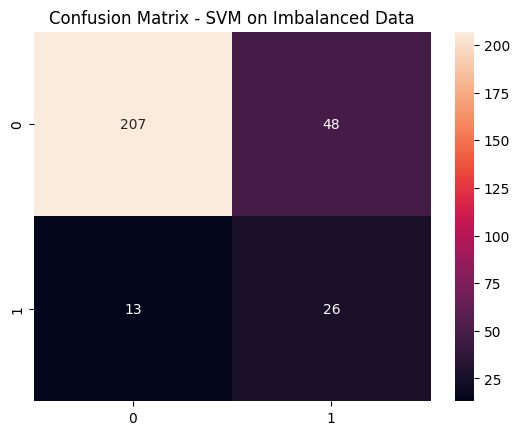

In [50]:
from sklearn.svm import SVC
model_svm_imbalanced = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
model_svm_imbalanced.fit(X_train, y_train)
y_pred_imbalanced = model_svm_imbalanced.predict(X_test)
print(classification_report(y_test, y_pred_imbalanced))
print("AUC-ROC Score:", roc_auc_score(y_test, model_svm_imbalanced.predict_proba(X_test)[:, 1]))
cm = confusion_matrix(y_test, y_pred_imbalanced)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - SVM on Imbalanced Data")
plt.show()

### SVM with balanced data

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       255
           1       0.40      0.69      0.51        39

    accuracy                           0.82       294
   macro avg       0.68      0.77      0.70       294
weighted avg       0.87      0.82      0.84       294

AUC-ROC Score: 0.8194067370537959


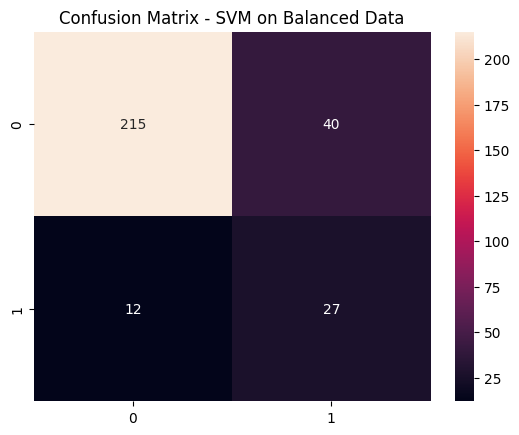

In [51]:
model_svm_balanced = SVC(kernel='rbf', class_weight=None, probability=True, random_state=42)
model_svm_balanced.fit(X_train_b, y_train_b)
y_pred_balanced_svm = model_svm_balanced.predict(X_test)
print(classification_report(y_test, y_pred_balanced_svm))
print("AUC-ROC Score:", roc_auc_score(y_test, model_svm_balanced.predict_proba(X_test)[:, 1]))
cm = confusion_matrix(y_test, y_pred_balanced_svm)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - SVM on Balanced Data")
plt.show()

### he SVM model trained on the balanced dataset generally performs better in terms of key metrics, especially in F1-Score and AUC-ROC score. This model has a better balance between precision and recall for the minority class (Attrition = 1).
### Random Forest with balanced data still outperforms SVM in terms of F1-Score (0.73 vs. 0.51), indicating it is better at handling the class imbalance while maintaining a reasonable precision and recall.

### Lets improve the Random Forest with balanced dataset, with Hyperparameter tunning

### Through following code I'll perform hyperparameter tuning for a Random Forest classifier using GridSearchCV to find the best combination of parameters (n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features) that maximize the F1 score with 5-fold cross-validation. It then trains the optimized model on the balanced training data (X_train_b, y_train_b) and evaluates its performance on the test set (X_test) by printing a classification report. The output includes the best hyperparameters found and the model's precision, recall, F1-score, and other metrics.

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train_b, y_train_b)
print("Best Hyperparameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Classification Report for Optimized RF:")
print(classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\rajar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
132 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rajar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rajar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\rajar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report for Optimized RF:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       255
           1       0.65      0.92      0.77        39

    accuracy                           0.93       294
   macro avg       0.82      0.92      0.86       294
weighted avg       0.94      0.93      0.93       294



<Axes: >

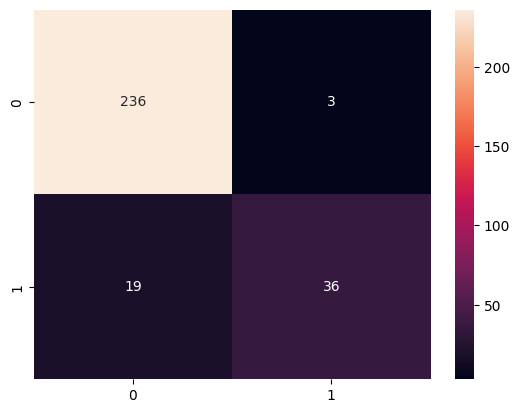

In [53]:
cm = confusion_matrix(y_pred_best, y_test)
sns.heatmap(cm, annot=True, fmt='d')

In [55]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred_best, y_test)))

Accuracy 92.51700680272108 %


### Finally best model is achieved 

### The fine-tuned Random Forest model performed exceptionally on the balanced dataset, achieving immense recall of 92% and a formidable F1-Score of 77% for the minority class (Attrition = 1). It vastly outperforms the Logistic Regression and SVM models on both balanced and imbalanced datasets, especially concerning recall and F1-score, which are fundamentally critical for tackling imbalanced data. The model skillfully balances high recall (imperative for identifying most attrition cases) with decent precision of 65%, culminating in a strong F1-Score, rendering it robust and impactful for real-world implementation.